<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Memory-Reduction" data-toc-modified-id="Memory-Reduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Memory Reduction</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Most-visited-page" data-toc-modified-id="Most-visited-page-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Most visited page</a></span></li><li><span><a href="#Top-5-pages-per-language" data-toc-modified-id="Top-5-pages-per-language-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Top 5 pages per language</a></span></li></ul></li><li><span><a href="#Data-Visualizations" data-toc-modified-id="Data-Visualizations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Visualizations</a></span><ul class="toc-item"><li><span><a href="#Single--Timeseries-Visualization" data-toc-modified-id="Single--Timeseries-Visualization-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Single  Timeseries Visualization</a></span></li><li><span><a href="#Language-montly-mean" data-toc-modified-id="Language-montly-mean-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Language montly mean</a></span></li><li><span><a href="#Timeseries-per-language" data-toc-modified-id="Timeseries-per-language-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Timeseries per language</a></span></li><li><span><a href="#Page-Visits-per-Week-Day" data-toc-modified-id="Page-Visits-per-Week-Day-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Page Visits per Week Day</a></span></li><li><span><a href="#Page-Visits-per-Month-Day" data-toc-modified-id="Page-Visits-per-Month-Day-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Page Visits per Month Day</a></span></li><li><span><a href="#Fast-Fourier-Transform-(FFT)" data-toc-modified-id="Fast-Fourier-Transform-(FFT)-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Fast Fourier Transform (FFT)</a></span></li></ul></li></ul></div>

# Data Description

Reference: https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

I have cleaned the kaggle wikipedia traffic data and selected only data of 2016 with 
fraction of 0.1.

The data was melted and additional columns were created.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('fivethirtyeight') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
random_state=100
np.random.seed(random_state)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [2]:
import dask
import dask.dataframe as dd
import gc

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Useful Scripts

In [4]:
def show_method_attributes(method, ncols=7,start=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [I for I in dir(method) if I[0]!='_' ]
    x = [I for I in x 
         if I not in 'os np pd sys time psycopg2'.split() ]
    if start:
        x = [I for I in x if I.startswith(start)]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

# Load the data

In [32]:
df = pd.read_csv('../../data/wiki/processed/data_cleaned_2016_frac01.csv',
                 parse_dates=['date'])

print(df.shape) # 5.3 million rows, 21 cols
df.head()

(5309196, 21)


Page  \
0                                             Sean_Connery_en.wikipedia.org_desktop_all-agents   
1  Tableau_des_médailles_des_Jeux_olympiques_d'été_de_2008_fr.wikipedia.org_desktop_all-agents   
2                                        The_Undertaker_fr.wikipedia.org_mobile-web_all-agents   
3                             Category:Outdoor_sex_commons.wikimedia.org_all-access_all-agents   
4                                               Камызяк_ru.wikipedia.org_all-access_all-agents   

        date  visits  year  month  day  quarter  dayofweek  dayofyear  \
0 2016-01-01    4872  2016      1    1        1          4          1   
1 2016-01-01       6  2016      1    1        1          4          1   
2 2016-01-01     469  2016      1    1        1          4          1   
3 2016-01-01     142  2016      1    1        1          4          1   
4 2016-01-01    6692  2016      1    1        1          4          1   

  day_name month_name  weekend  weekday         mean  median  \
0   Friday    January    False     True  3405.661202  2624.0   
1   Friday    January    False     True   170.841530    18.0   
2   Friday    January    False     True   400.336066   345.5   
3   Friday    January    False     True   205.174863   193.0   
4   Friday    January    False     True   912.516393   559.0   

                                                      name  \
0                                             Sean_Connery   
1  Tableau_des_médailles_des_Jeux_olympiques_d'été_de_2008   
2                                           The_Undertaker   
3                                     Category:Outdoor_sex   
4                                                  Камызяк   

                 project      access       agent     lang language  
0       en.wikipedia.org     desktop  all-agents       en  English  
1       fr.wikipedia.org     desktop  all-agents       fr   French  
2       fr.wikipedia.org  mobile-web  all-agents       fr   French  
3  commons.wikimedia.org  all-access  all-agents  commons    Media  
4       ru.wikipedia.org  all-access  all-agents       ru  Russian

# Memory Reduction

In [33]:
df.dtypes

Page                  object
date          datetime64[ns]
visits                 int64
year                   int64
month                  int64
day                    int64
quarter                int64
dayofweek              int64
dayofyear              int64
day_name              object
month_name            object
weekend                 bool
weekday                 bool
mean                 float64
median               float64
name                  object
project               object
access                object
agent                 object
lang                  object
language              object
dtype: object

In [34]:
df.memory_usage(deep=True).sum() * 1e-6 # MB

4069.15316

In [35]:
# all the year is 2016,drop it.

df.drop('year',axis=1,inplace=True)

In [36]:
cols_int = ['visits']
cols_cat = ['month','day','quarter','day_name','month_name',
            'project','access','agent','language']

cols_float = ['mean','median']

for c in cols_int:
    df[c] = df[c].astype(np.int32)
    
for c in cols_float:
    df[c] = df[c].astype(np.float32)
    

for c in cols_cat:
    df[c] = df[c].astype(pd.api.types.CategoricalDtype())

In [55]:
# make day_name and month_name ordered categorical
df['day_name'].unique()

[Friday, Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday]
Categories (7, object): [Friday, Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday]

In [58]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day_name'] = pd.Categorical(df['day_name'], ordered=True, categories=cats)

df['day_name'].unique()

[Friday, Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [65]:
df['month_name'].unique()

[January, February, March, April, May, ..., August, September, October, November, December]
Length: 12
Categories (12, object): [January, February, March, April, ..., September, October, November, December]

In [66]:
show_method_attributes(df['month_name'].unique())

0                  1               2             3  \
0               T  check_for_ordered          fillna           map   
1  add_categories              codes      from_codes           max   
2         argsort               copy      get_values  memory_usage   
3      as_ordered           describe  is_dtype_equal           min   
4    as_unordered             dropna            isin          mode   
5          astype              dtype            isna        nbytes   
6            base             equals          isnull          ndim   
7      categories          factorize        itemsize         notna   

                          4               5             6  
0                   notnull          repeat          take  
1                   ordered    searchsorted       take_nd  
2                       put  set_categories      to_dense  
3                     ravel     set_ordered       to_list  
4         remove_categories           shape        unique  
5  remove_unused_categories           shift  value_counts  
6         rename_categories            size          view  
7        reorder_categories     sort_values

In [75]:
df['month_name'].unique().categories

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [76]:
cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']

df['month_name'] = pd.Categorical(df['month_name'], ordered=True, categories=cats)

df['month_name'].unique()

[January, February, March, April, May, ..., August, September, October, November, December]
Length: 12
Categories (12, object): [January < February < March < April ... September < October < November < December]

In [37]:
df.memory_usage(deep=True).sum() * 1e-6 # MB

1777.2233549999999

In [47]:
for c in cols_cat:
    print(c)
    print(df[c].value_counts().sort_index())
    print()

month
1     449686
2     420674
3     449686
4     435180
5     449686
6     435180
7     449686
8     449686
9     435180
10    449686
11    435180
12    449686
Name: month, dtype: int64

day
1     174072
2     174072
3     174072
4     174072
5     174072
6     174072
7     174072
8     174072
9     174072
10    174072
11    174072
12    174072
13    174072
14    174072
15    174072
16    174072
17    174072
18    174072
19    174072
20    174072
21    174072
22    174072
23    174072
24    174072
25    174072
26    174072
27    174072
28    174072
29    174072
30    159566
31    101542
Name: day, dtype: int64

quarter
1    1320046
2    1320046
3    1334552
4    1334552
Name: quarter, dtype: int64

day_name
Friday       768818
Monday       754312
Saturday     768818
Sunday       754312
Thursday     754312
Tuesday      754312
Wednesday    754312
Name: day_name, dtype: int64

month_name
April        435180
August       449686
December     449686
February     420674
January      449686


# Exploratory Data Analysis (EDA)

## Most visited page

In [147]:
print(df.shape)
df.head()

(5309196, 20)


Page  \
0                                             Sean_Connery_en.wikipedia.org_desktop_all-agents   
1  Tableau_des_médailles_des_Jeux_olympiques_d'été_de_2008_fr.wikipedia.org_desktop_all-agents   
2                                        The_Undertaker_fr.wikipedia.org_mobile-web_all-agents   
3                             Category:Outdoor_sex_commons.wikimedia.org_all-access_all-agents   
4                                               Камызяк_ru.wikipedia.org_all-access_all-agents   

        date  visits month day quarter  dayofweek  dayofyear day_name  \
0 2016-01-01    4872     1   1       1          4          1   Friday   
1 2016-01-01       6     1   1       1          4          1   Friday   
2 2016-01-01     469     1   1       1          4          1   Friday   
3 2016-01-01     142     1   1       1          4          1   Friday   
4 2016-01-01    6692     1   1       1          4          1   Friday   

  month_name  weekend  weekday         mean  median  \
0    January    False     True  3405.661133  2624.0   
1    January    False     True   170.841537    18.0   
2    January    False     True   400.336060   345.5   
3    January    False     True   205.174866   193.0   
4    January    False     True   912.516418   559.0   

                                                      name  \
0                                             Sean_Connery   
1  Tableau_des_médailles_des_Jeux_olympiques_d'été_de_2008   
2                                           The_Undertaker   
3                                     Category:Outdoor_sex   
4                                                  Камызяк   

                 project      access       agent     lang language  
0       en.wikipedia.org     desktop  all-agents       en  English  
1       fr.wikipedia.org     desktop  all-agents       fr   French  
2       fr.wikipedia.org  mobile-web  all-agents       fr   French  
3  commons.wikimedia.org  all-access  all-agents  commons    Media  
4       ru.wikipedia.org  all-access  all-agents       ru  Russian

In [144]:
df['Page'].nunique() # there are 14.5k unique pages visited in 2016

14506

In [150]:
df.groupby('Page')['visits'].sum()

Page
"Keep_me_logged_in"_extended_to_one_year_www.mediawiki.org_mobile-web_all-agents        728
.bn_ru.wikipedia.org_desktop_all-agents                                               49200
007:_Спектр_ru.wikipedia.org_desktop_all-agents                                      308925
007_スペクター_ja.wikipedia.org_desktop_all-agents                                        219297
007：惡魔四伏_zh.wikipedia.org_desktop_all-agents                                         142666
                                                                                     ...   
龍涎香_zh.wikipedia.org_desktop_all-agents                                               56076
龍珠超_zh.wikipedia.org_all-access_spider                                                28444
龔嘉欣_zh.wikipedia.org_all-access_all-agents                                           178525
［Alexandros］_ja.wikipedia.org_all-access_spider                                       92253
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents                        

In [154]:
df.groupby('Page')['visits'].sum().sort_values(ascending=False)

Page
Special:Search_en.wikipedia.org_desktop_all-agents                                                                                                675606021
Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents                                                                                581446666
Служебная:Поиск_ru.wikipedia.org_all-access_all-agents                                                                                             65811140
Spécial:Recherche_fr.wikipedia.org_all-access_all-agents                                                                                           64200822
Web_scraping_en.wikipedia.org_all-access_all-agents                                                                                                40047558
                                                                                                                                                    ...    
Nafri_de.wikipedia.org_desktop_all-agents                  

In [153]:
df.groupby('Page')['visits'].sum().nlargest(5)

Page
Special:Search_en.wikipedia.org_desktop_all-agents                    675606021
Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents    581446666
Служебная:Поиск_ru.wikipedia.org_all-access_all-agents                 65811140
Spécial:Recherche_fr.wikipedia.org_all-access_all-agents               64200822
Web_scraping_en.wikipedia.org_all-access_all-agents                    40047558
Name: visits, dtype: int32

In [156]:
df.query(""" Page == 'Special:Search_en.wikipedia.org_desktop_all-agents' """).head()

Page       date   visits  \
2297   Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-01  1401667   
16803  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-02  1395136   
31309  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-03  1455522   
45815  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-04  1750373   
60321  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-05  1787494   

      month day quarter  dayofweek  dayofyear  day_name month_name  weekend  \
2297      1   1       1          4          1    Friday    January    False   
16803     1   2       1          5          2  Saturday    January     True   
31309     1   3       1          6          3    Sunday    January     True   
45815     1   4       1          0          4    Monday    January    False   
60321     1   5       1          1          5   Tuesday    January    False   

       weekday         mean     median            name           project  \
2297      True  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
16803    False  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
31309    False  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
45815     True  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
60321     True  1845918.125  1700576.5  Special:Search  en.wikipedia.org   

        access       agent lang language  
2297   desktop  all-agents   en  English  
16803  desktop  all-agents   en  English  
31309  desktop  all-agents   en  English  
45815  desktop  all-agents   en  English  
60321  desktop  all-agents   en  English

## Top 5 pages per language

In [13]:
# df.groupby('language')['visits'].nlargest(5)

In [14]:
# df.groupby('language')['visits'].apply(lambda x: x.nlargest(5))

In [15]:
# df.groupby('language')['visits'].apply(lambda x: x.nlargest(5).index)

In [16]:
df.groupby('language')['visits'].apply(lambda x: df.loc[x.nlargest(5).index])

Page  \
language                                                                                              
Chinese  3526717                                     緋彈的亞莉亞角色列表_zh.wikipedia.org_desktop_all-agents   
         727287                                            九层妖塔_zh.wikipedia.org_desktop_all-agents   
         2401631                                           伊是名島_zh.wikipedia.org_desktop_all-agents   
         3585506                                2016年香港立法會選舉_zh.wikipedia.org_all-access_all-agents   
         3600012                                2016年香港立法會選舉_zh.wikipedia.org_all-access_all-agents   
English  2714919                                 Special:Search_en.wikipedia.org_desktop_all-agents   
         3556267                                 Special:Search_en.wikipedia.org_desktop_all-agents   
         3570773                                 Special:Search_en.wikipedia.org_desktop_all-agents   
         3541761                                 Special:Search_en.wikipedia.org_desktop_all-agents   
         3585279                                 Special:Search_en.wikipedia.org_desktop_all-agents   
French   2163034                 Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents   
         2075998                 Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents   
         2177540                 Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents   
         1872914                 Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents   
         1203163                              Spécial:Connexion_fr.wikipedia.org_desktop_all-agents   
German   4439792                                  Gerätestecker_de.wikipedia.org_desktop_all-agents   
         2583806                                      Island_de.wikipedia.org_all-access_all-agents   
         2260103                                Muhammad_Ali_de.wikipedia.org_all-access_all-agents   
         2586487                                      Island_de.wikipedia.org_mobile-web_all-agents   
         4570774                                  San_Marino_de.wikipedia.org_all-access_all-agents   
Japanese 2724137                              デイヴィッド・ロックフェラー_ja.wikipedia.org_all-access_all-agents   
         2738643                              デイヴィッド・ロックフェラー_ja.wikipedia.org_all-access_all-agents   
         1877171                                       ポラロイド_ja.wikipedia.org_all-access_all-agents   
         1871642                                          ポラロイド_ja.wikipedia.org_desktop_all-agents   
         621742                                         宮崎謙介_ja.wikipedia.org_all-access_all-agents   
Media    1865460                    Parsoid/Developer_Setup_www.mediawiki.org_all-access_all-agents   
         1850954                    Parsoid/Developer_Setup_www.mediawiki.org_all-access_all-agents   
         1879966                    Parsoid/Developer_Setup_www.mediawiki.org_all-access_all-agents   
         1836448                    Parsoid/Developer_Setup_www.mediawiki.org_all-access_all-agents   
         3552910                        Extension:CiteThisPage_www.mediawiki.org_desktop_all-agents   
Russian  4179962                             Служебная:Поиск_ru.wikipedia.org_all-access_all-agents   
         4194468                             Служебная:Поиск_ru.wikipedia.org_all-access_all-agents   
         2249807                               Али,_Мохаммед_ru.wikipedia.org_all-access_all-agents   
         2833429                   Toyota_Land_Cruiser_Prado_ru.wikipedia.org_all-access_all-agents   
         4165456                             Служебная:Поиск_ru.wikipedia.org_all-access_all-agents   
Spanish  2376682                                           Nilo_es.wikipedia.org_desktop_all-agents   
         4790265                                Fidel_Castro_es.wikipedia.org_mobile-web_all-agents   
         4275186  Asesinato_de_Luis_Donaldo_Colosio_Murrieta_es.wikipedia.org_

# Data Visualizations

## Single  Timeseries Visualization

In [157]:
idx = df.groupby('Page')['visits'].sum().idxmax()
df.query(""" Page == @idx """).head()

Page       date   visits  \
2297   Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-01  1401667   
16803  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-02  1395136   
31309  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-03  1455522   
45815  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-04  1750373   
60321  Special:Search_en.wikipedia.org_desktop_all-agents 2016-01-05  1787494   

      month day quarter  dayofweek  dayofyear  day_name month_name  weekend  \
2297      1   1       1          4          1    Friday    January    False   
16803     1   2       1          5          2  Saturday    January     True   
31309     1   3       1          6          3    Sunday    January     True   
45815     1   4       1          0          4    Monday    January    False   
60321     1   5       1          1          5   Tuesday    January    False   

       weekday         mean     median            name           project  \
2297      True  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
16803    False  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
31309    False  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
45815     True  1845918.125  1700576.5  Special:Search  en.wikipedia.org   
60321     True  1845918.125  1700576.5  Special:Search  en.wikipedia.org   

        access       agent lang language  
2297   desktop  all-agents   en  English  
16803  desktop  all-agents   en  English  
31309  desktop  all-agents   en  English  
45815  desktop  all-agents   en  English  
60321  desktop  all-agents   en  English

In [158]:
ts = df.query(""" Page == @idx """)[['date','visits']].set_index('date')

print(ts.shape)
ts.head()

(366, 1)


visits
date               
2016-01-01  1401667
2016-01-02  1395136
2016-01-03  1455522
2016-01-04  1750373
2016-01-05  1787494

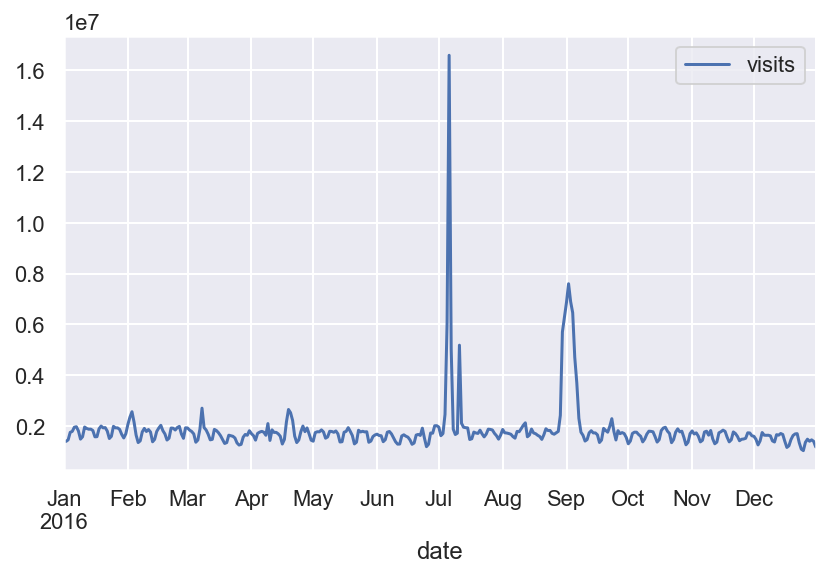

In [159]:
ts.plot()

# ts is periodic
# ts has some very large peaks
# ts in not going upward, it does not have trend (it may have if I have more years)

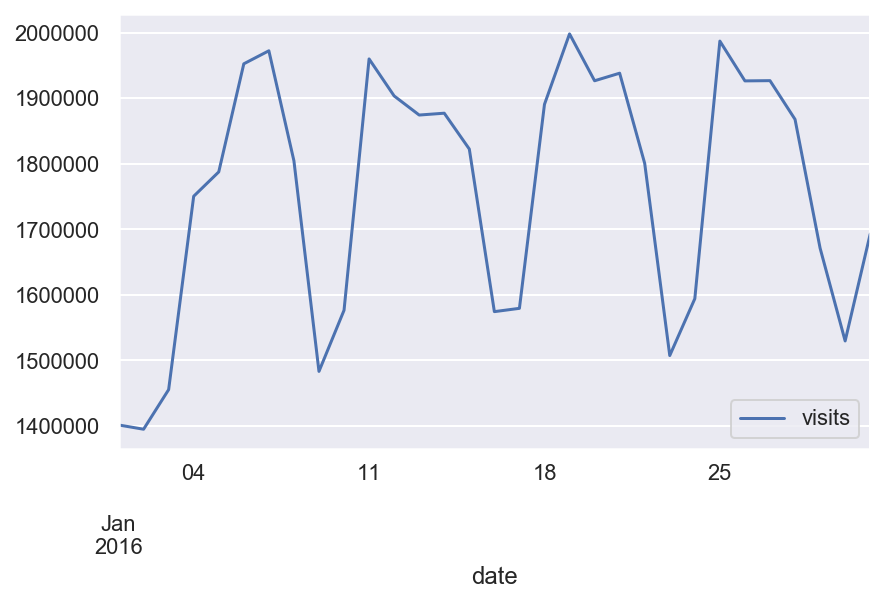

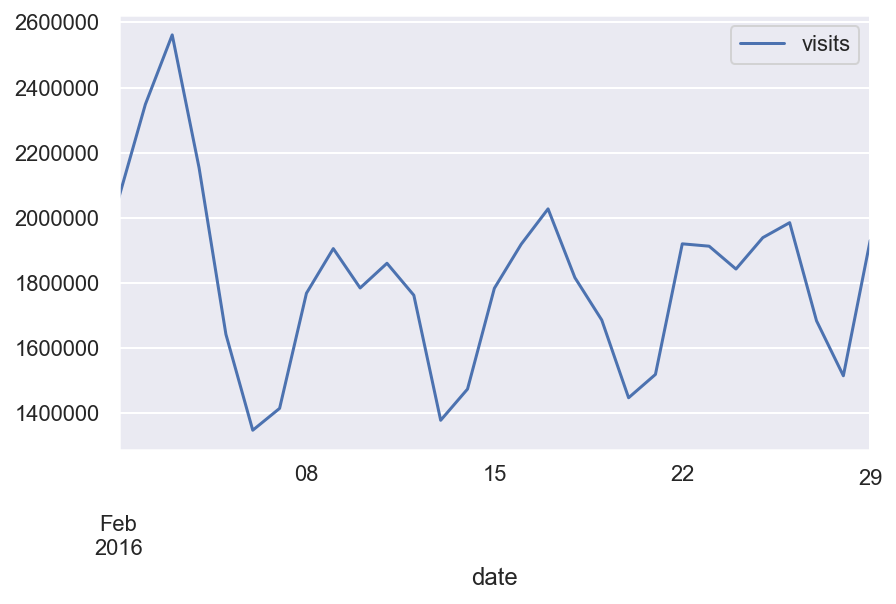

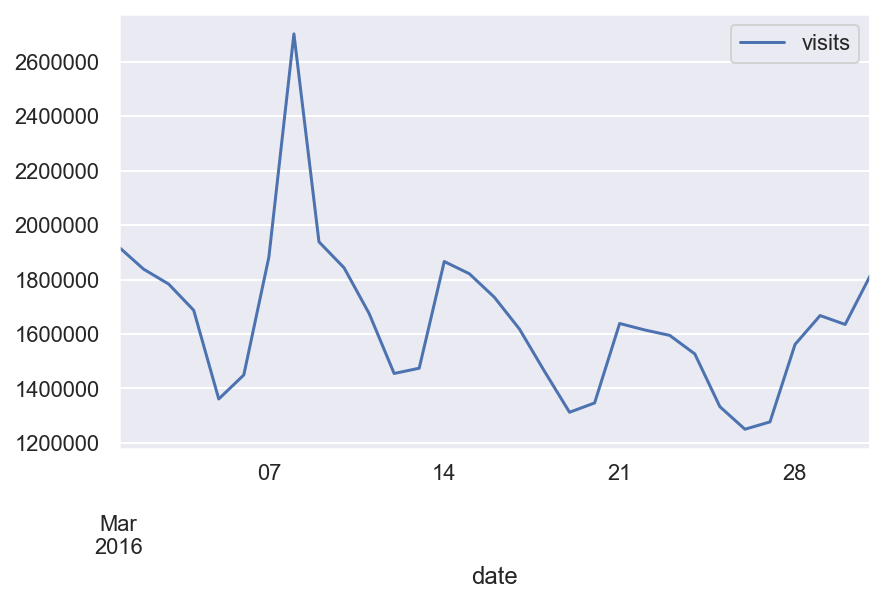

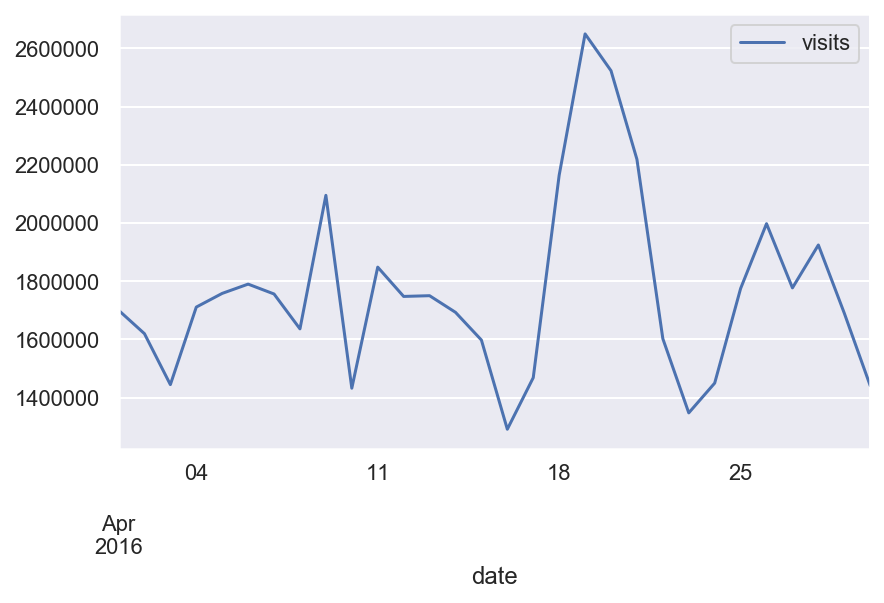

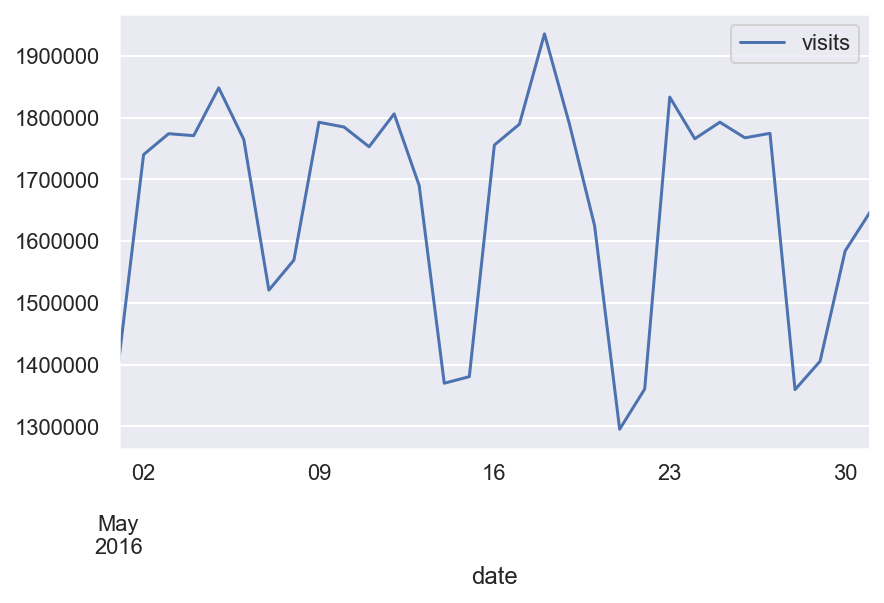

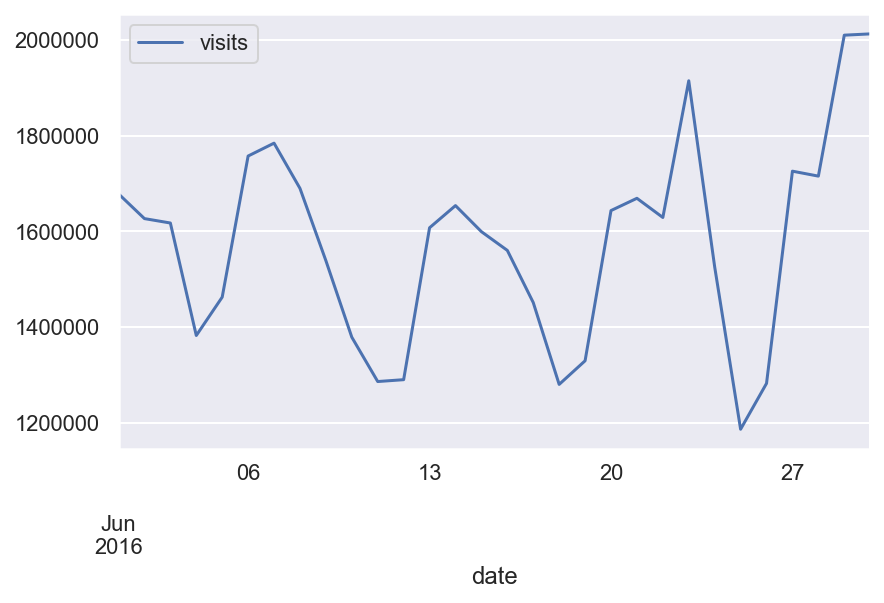

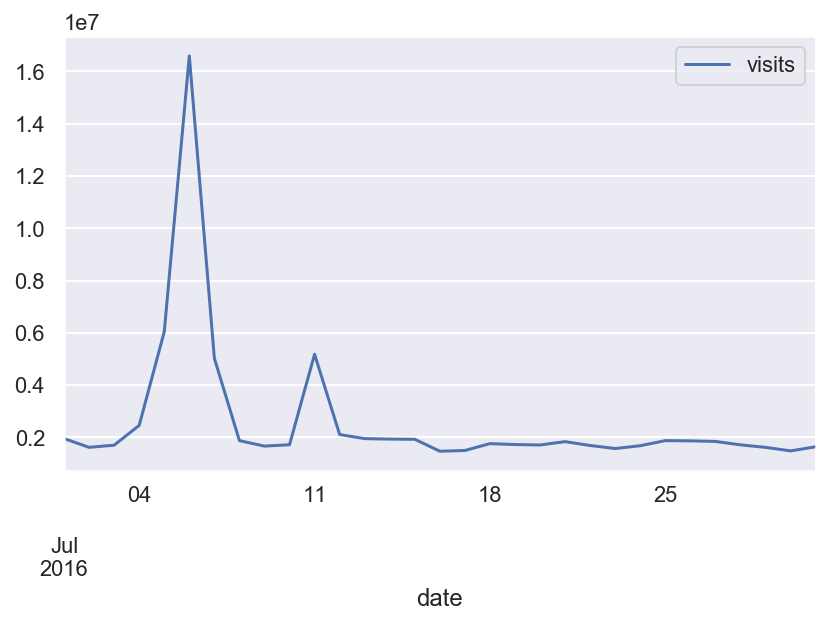

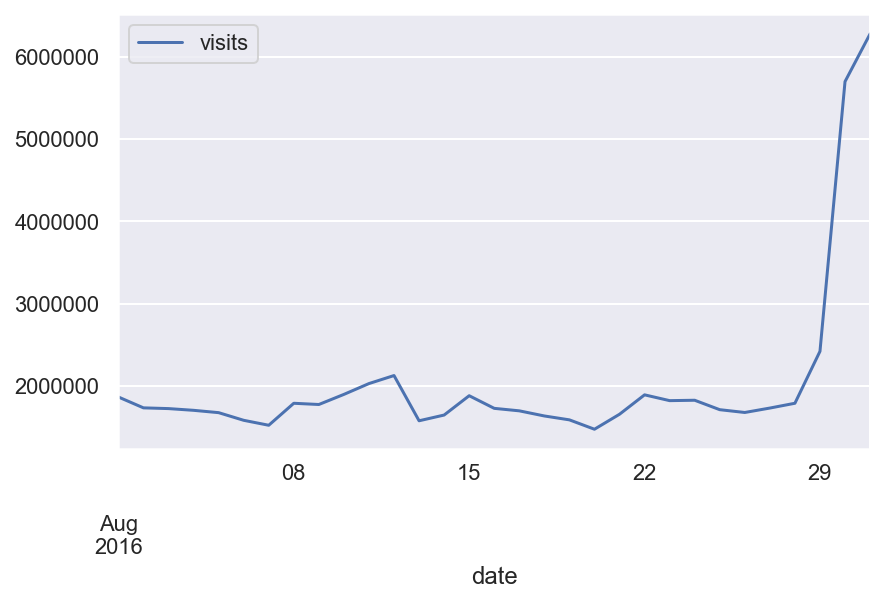

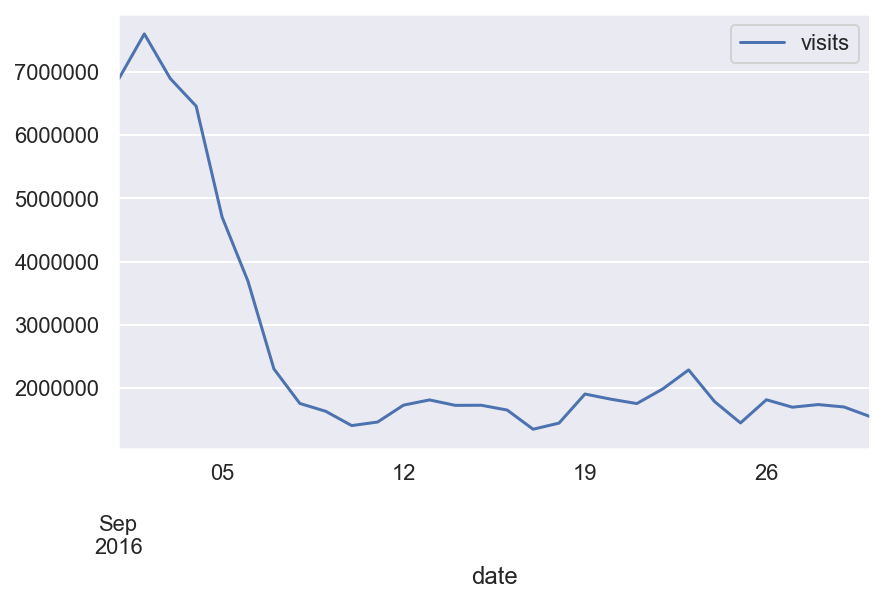

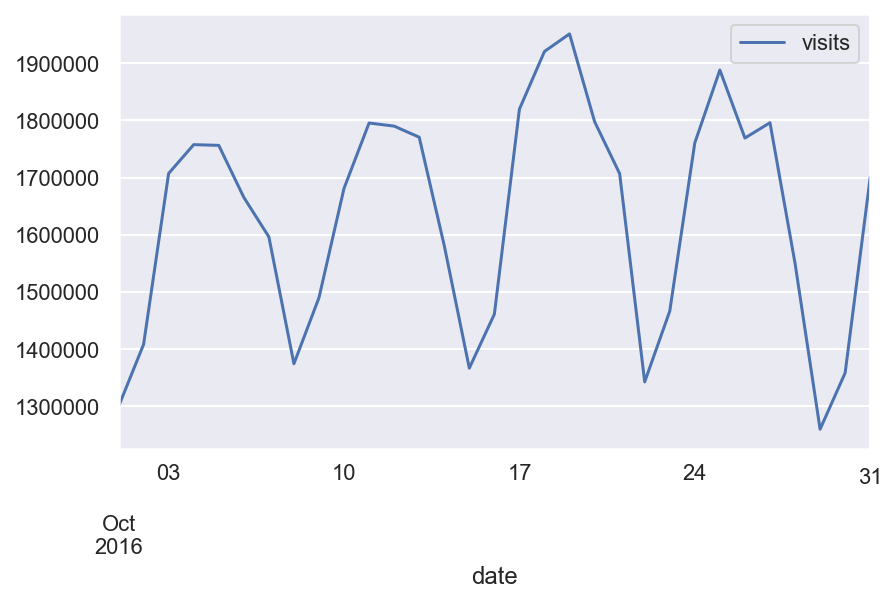

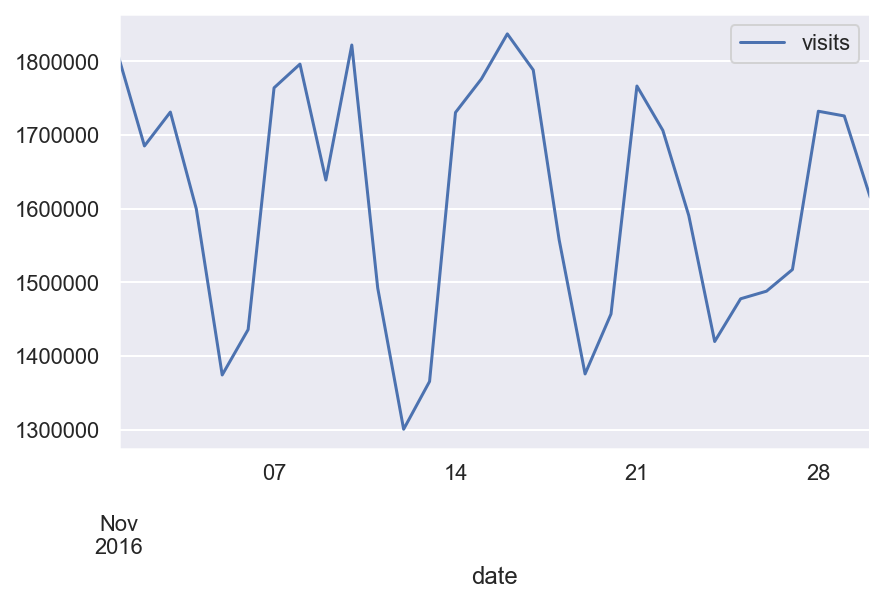

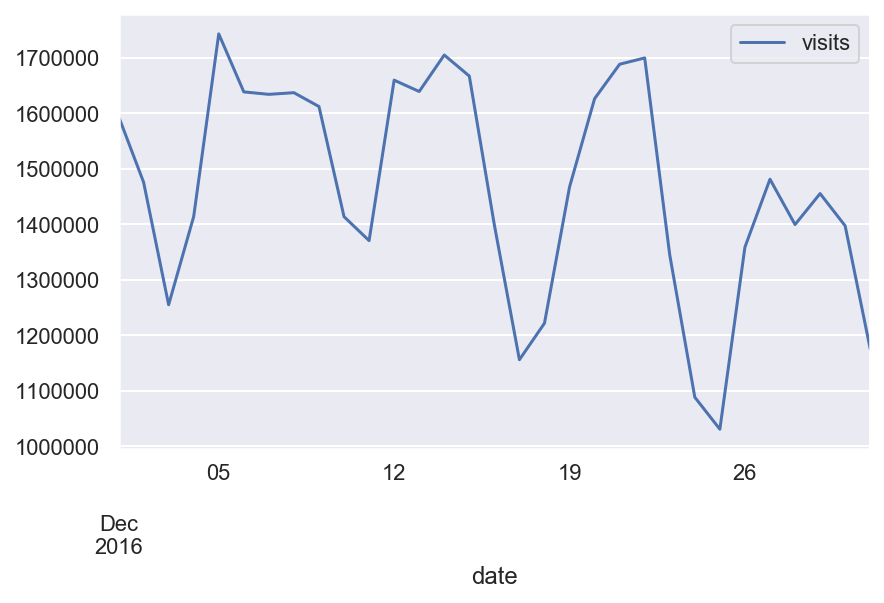

In [163]:
ts.groupby(ts.index.month).plot();

## Language montly mean

In [17]:
df.head(2)

Page  \
0                                             Sean_Connery_en.wikipedia.org_desktop_all-agents   
1  Tableau_des_médailles_des_Jeux_olympiques_d'été_de_2008_fr.wikipedia.org_desktop_all-agents   

        date  visits month day quarter  dayofweek  dayofyear day_name  \
0 2016-01-01    4872     1   1       1          4          1   Friday   
1 2016-01-01       6     1   1       1          4          1   Friday   

  month_name  weekend  weekday         mean  median  \
0    January    False     True  3405.661133  2624.0   
1    January    False     True   170.841537    18.0   

                                                      name           project  \
0                                             Sean_Connery  en.wikipedia.org   
1  Tableau_des_médailles_des_Jeux_olympiques_d'été_de_2008  fr.wikipedia.org   

    access       agent language  
0  desktop  all-agents  English  
1  desktop  all-agents   French

In [18]:
fname_lang_monthly_mean = '../reports/figures/2016_sample001_monthly_visits.png'


if not os.path.isfile(fname_lang_monthly_mean):
    plt.figure(figsize=(12,12))
    sns.pointplot(x="month_name", y="visits", hue='language', data=df,estimator='mean')
    plt.savefig(fname_lang_monthly_mean, dpi=300)

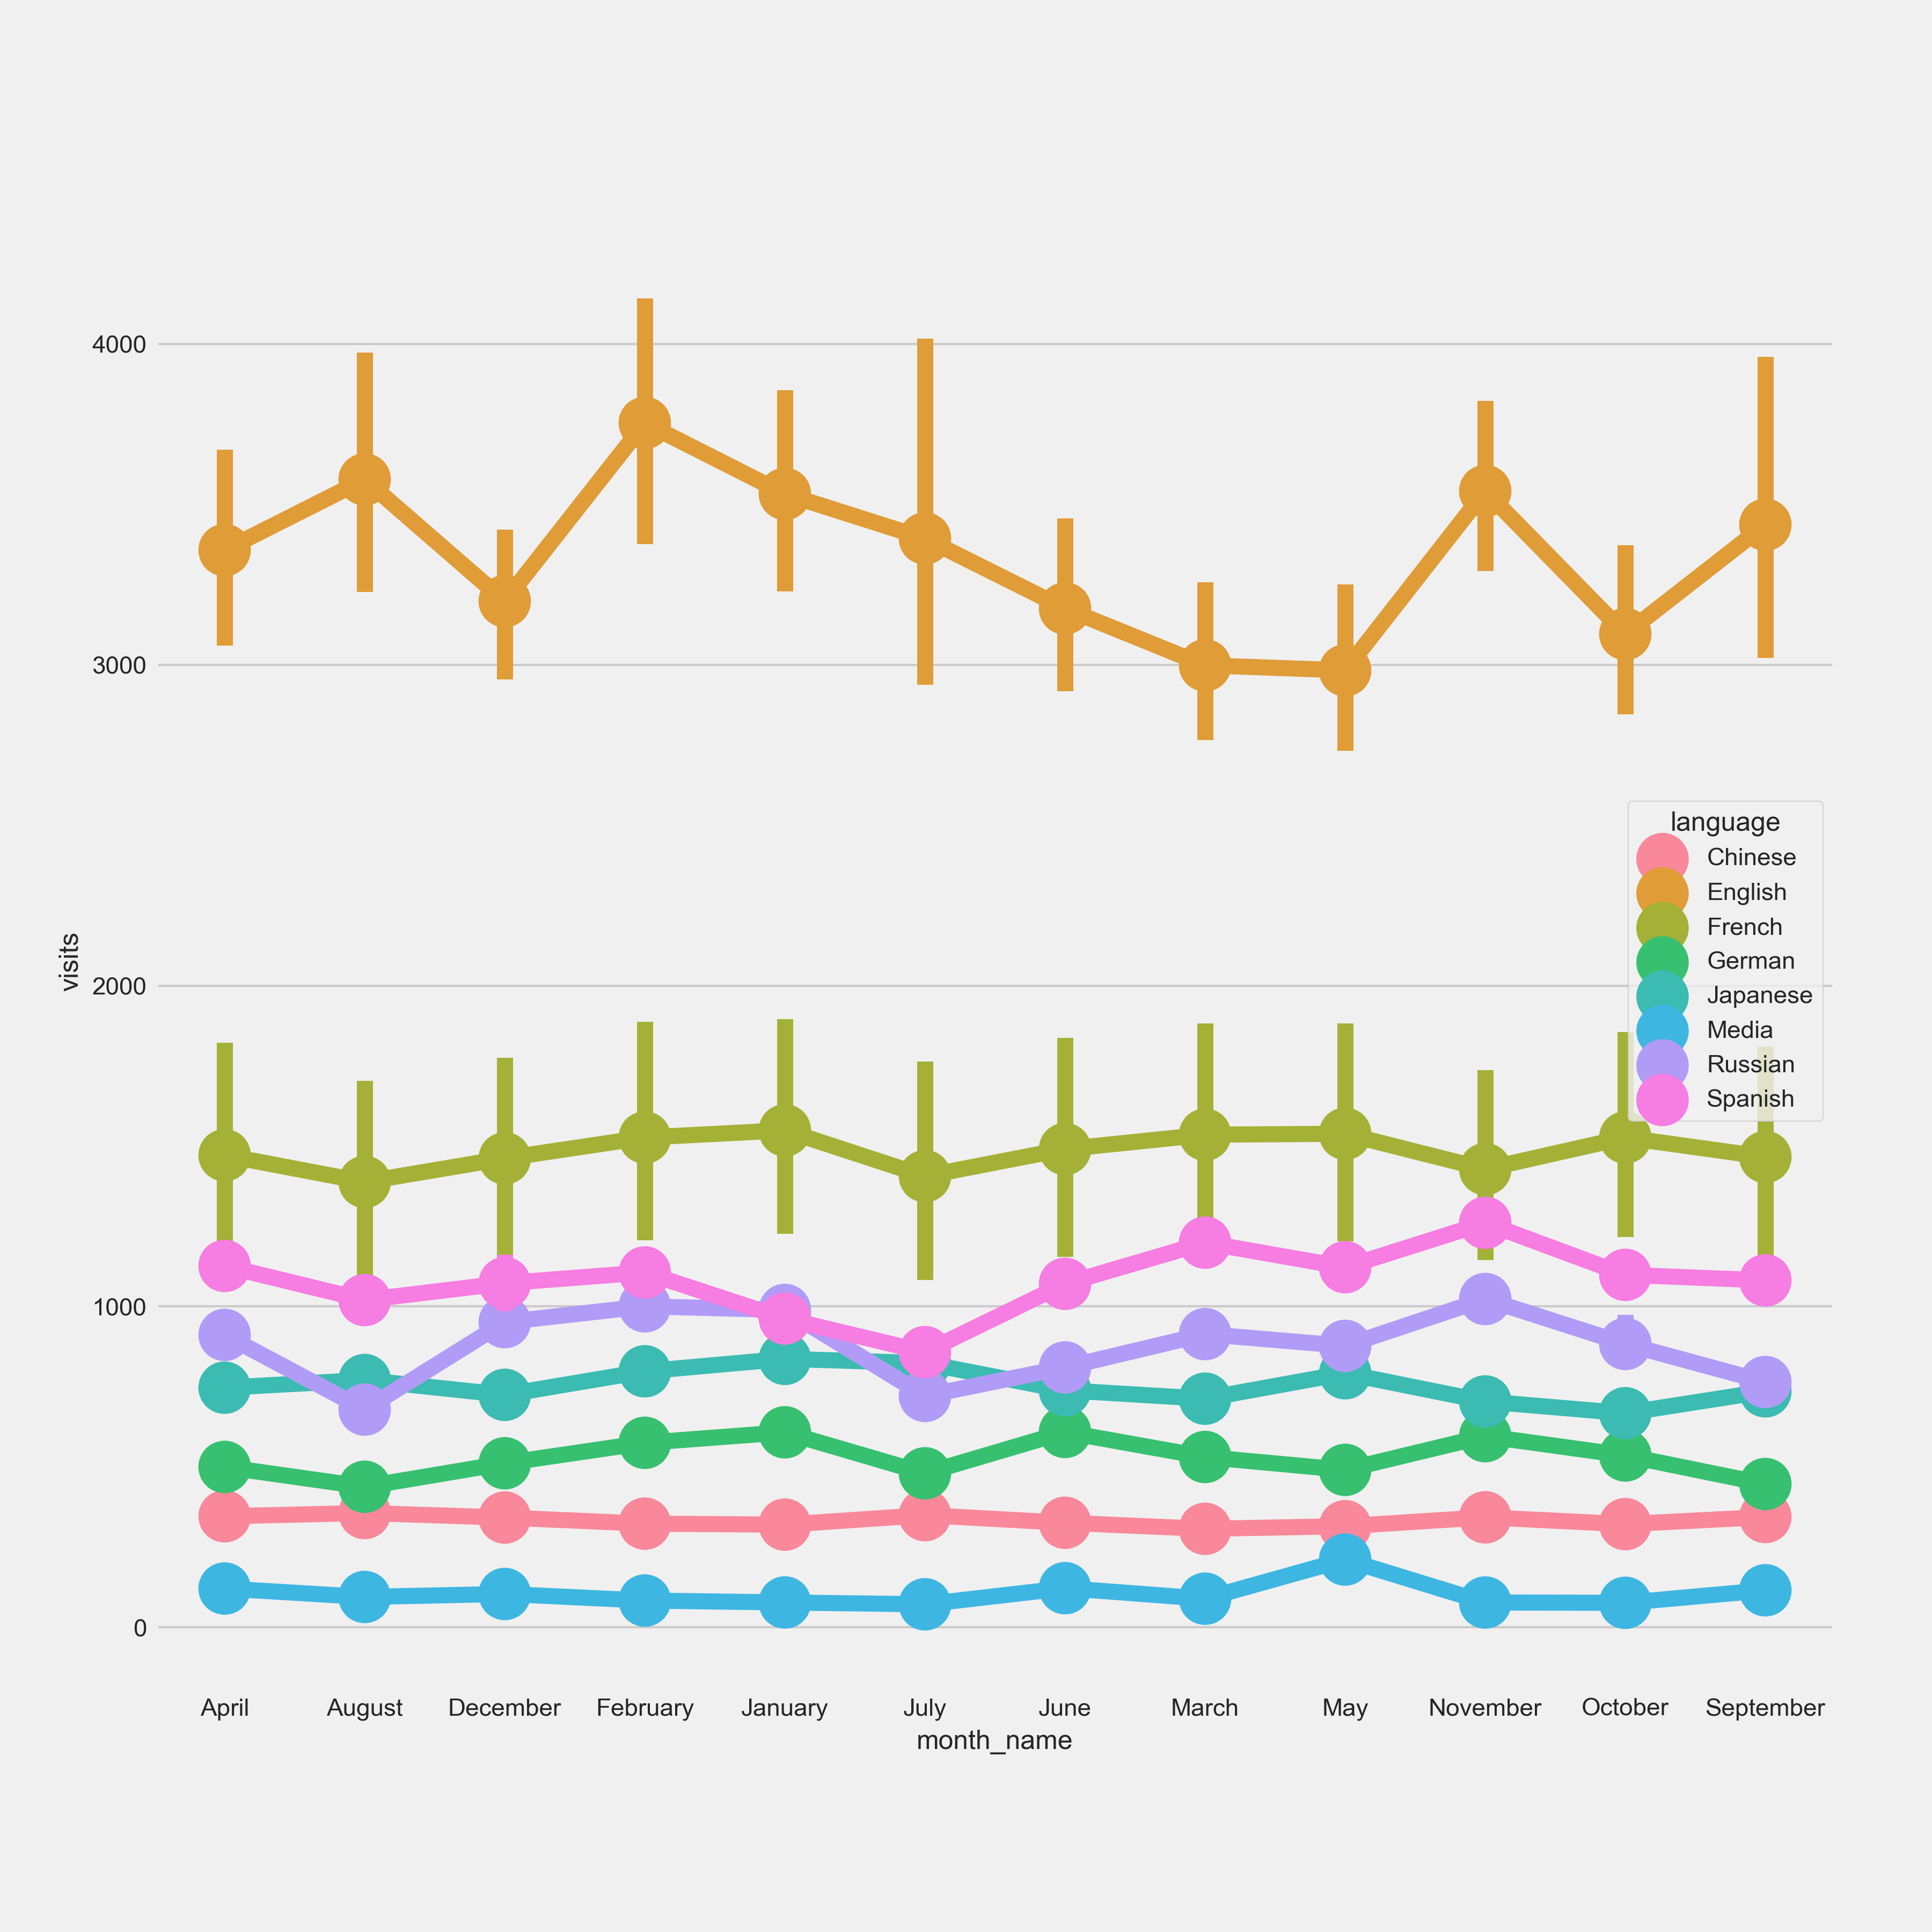

In [19]:
Image(fname_lang_monthly_mean)

In [20]:
# df.groupby(['month_name', 'language'])['visits'].sum().unstack().reset_index()
# TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

In [21]:
df.groupby(['month_name', 'language'])['visits'].mean().unstack()

language       Chinese      English       French      German    Japanese  \
month_name                                                                 
April       346.284022  3357.215861  1471.329241  499.983670  746.976186   
August      356.399893  3577.341925  1388.243592  438.243154  770.811635   
December    342.306655  3198.113191  1461.638758  511.450275  724.673610   
February    323.293440  3753.439604  1526.610105  575.243269  798.092583   
January     320.215881  3532.314414  1549.011271  607.940031  836.786685   
July        349.729306  3393.508837  1406.123128  480.157773  823.521079   
June        326.015117  3175.392253  1490.617441  608.998475  738.780800   
March       307.180716  2998.148075  1535.426017  531.052471  712.769806   
May         315.227825  2982.470396  1538.262987  490.853380  791.984027   
November    343.012246  3541.270469  1428.079633  595.995053  704.154969   
October     321.757231  3095.529577  1526.691263  535.785999  667.404647   
September   343.960295  3436.207492  1465.977357  446.790869  735.662811   

language         Media      Russian      Spanish  
month_name                                        
April       121.054883   911.464255  1126.387741  
August       94.792048   678.857298  1020.159426  
December    104.160007   951.266525  1072.698443  
February     83.687144  1000.508064  1106.103324  
January      77.659781   989.145724   962.381643  
July         71.903840   721.329228   857.897445  
June        122.201494   810.115568  1070.707346  
March        89.373850   914.002021  1199.071742  
May         211.465600   877.348358  1122.429564  
November     77.519122  1023.325431  1260.698964  
October      76.556176   883.324435  1098.649380  
September   115.615686   764.727713  1081.434658

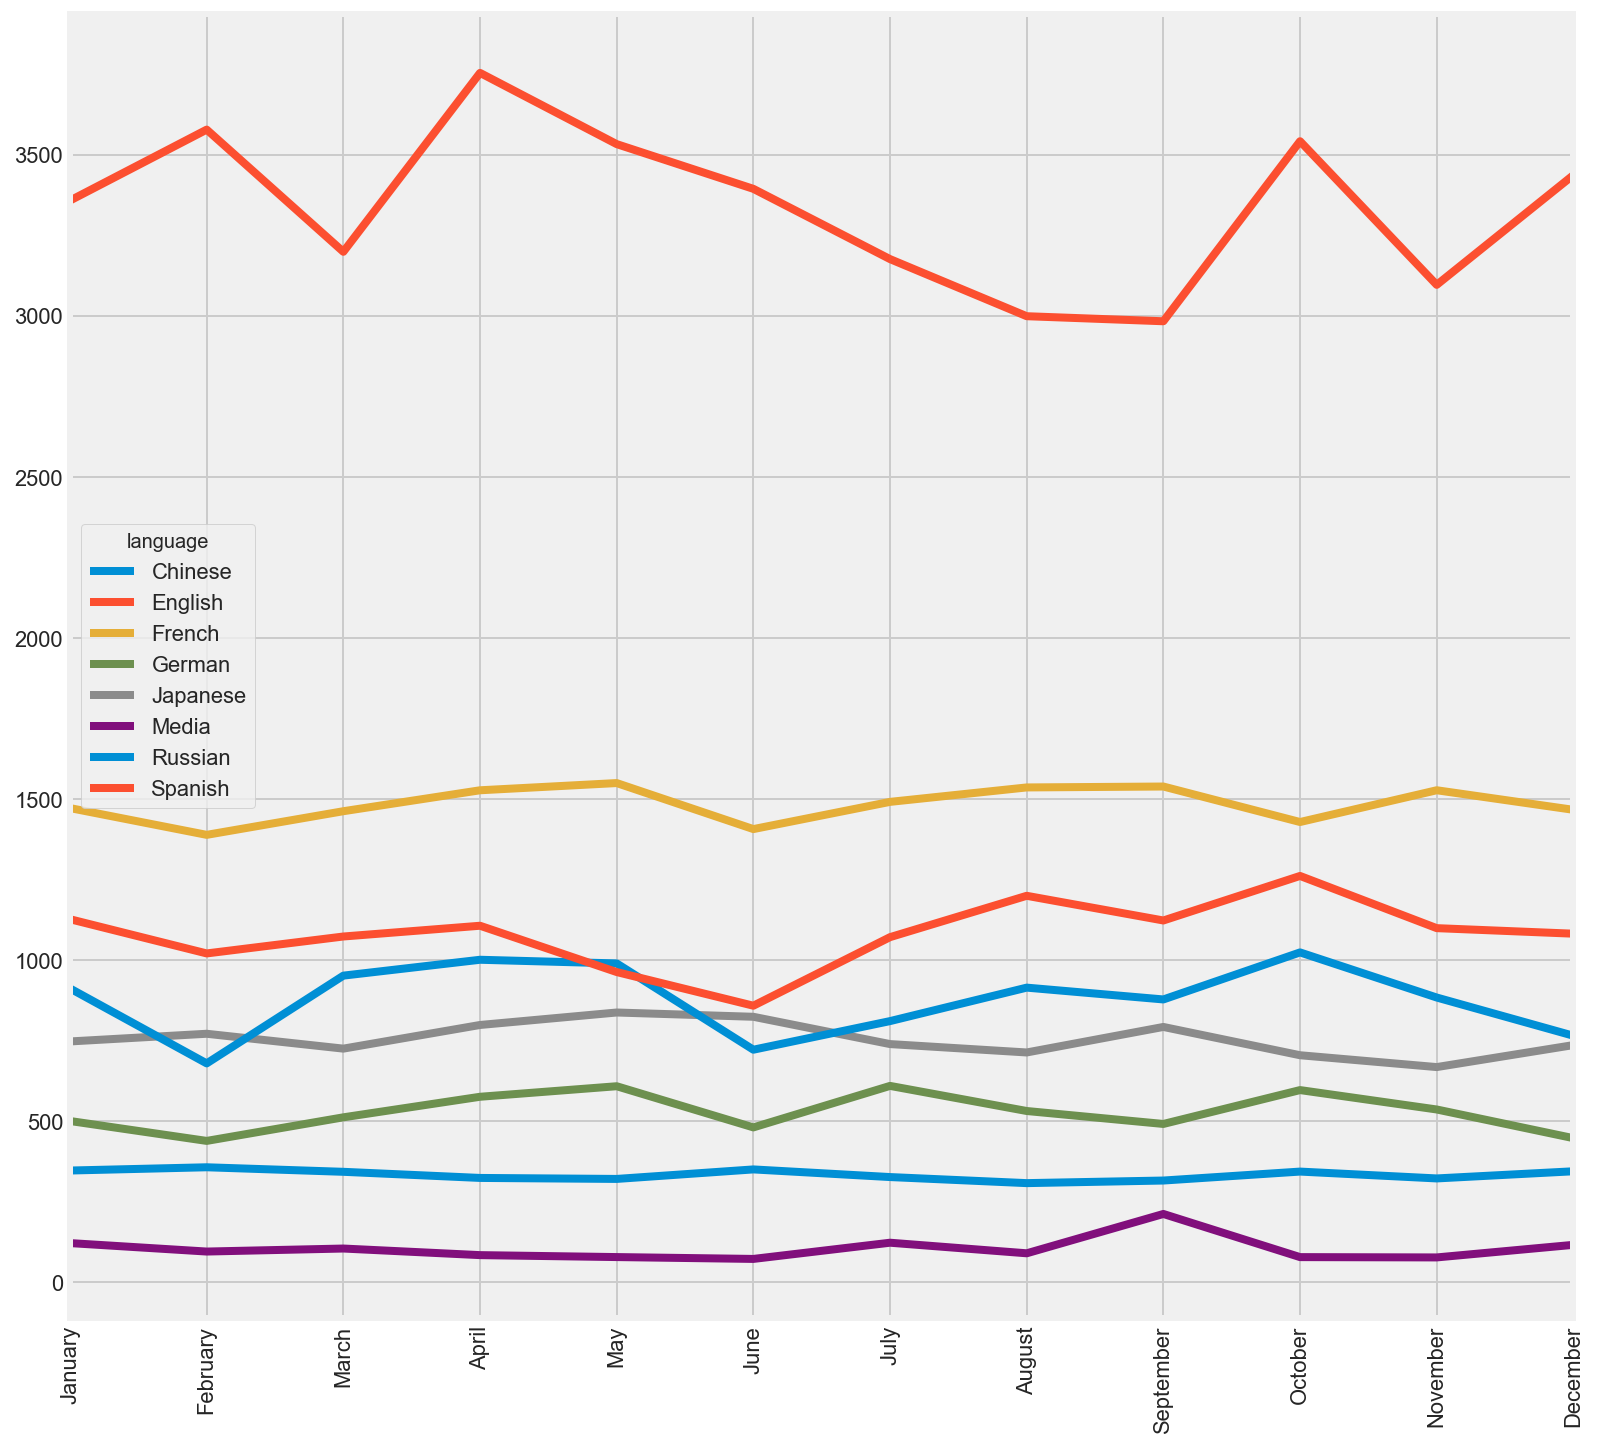

In [22]:
ax = df.groupby(['month_name', 'language'])['visits'].mean().unstack()\
.reset_index(drop=True).plot(figsize=(12,12), logy=False )

plt.xticks(range(12), rotation=90)
ax.set_xticklabels(df['month_name'].unique());

In [23]:
# exclude english and compare others

In [24]:
# plt.figure(figsize=(12,12))

# df.query("""language != 'English'""").pipe((sns.pointplot,'data'), x='month_name',
#                                                         y='visits',hue='language')
# # ValueError: 'c' argument has 12 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

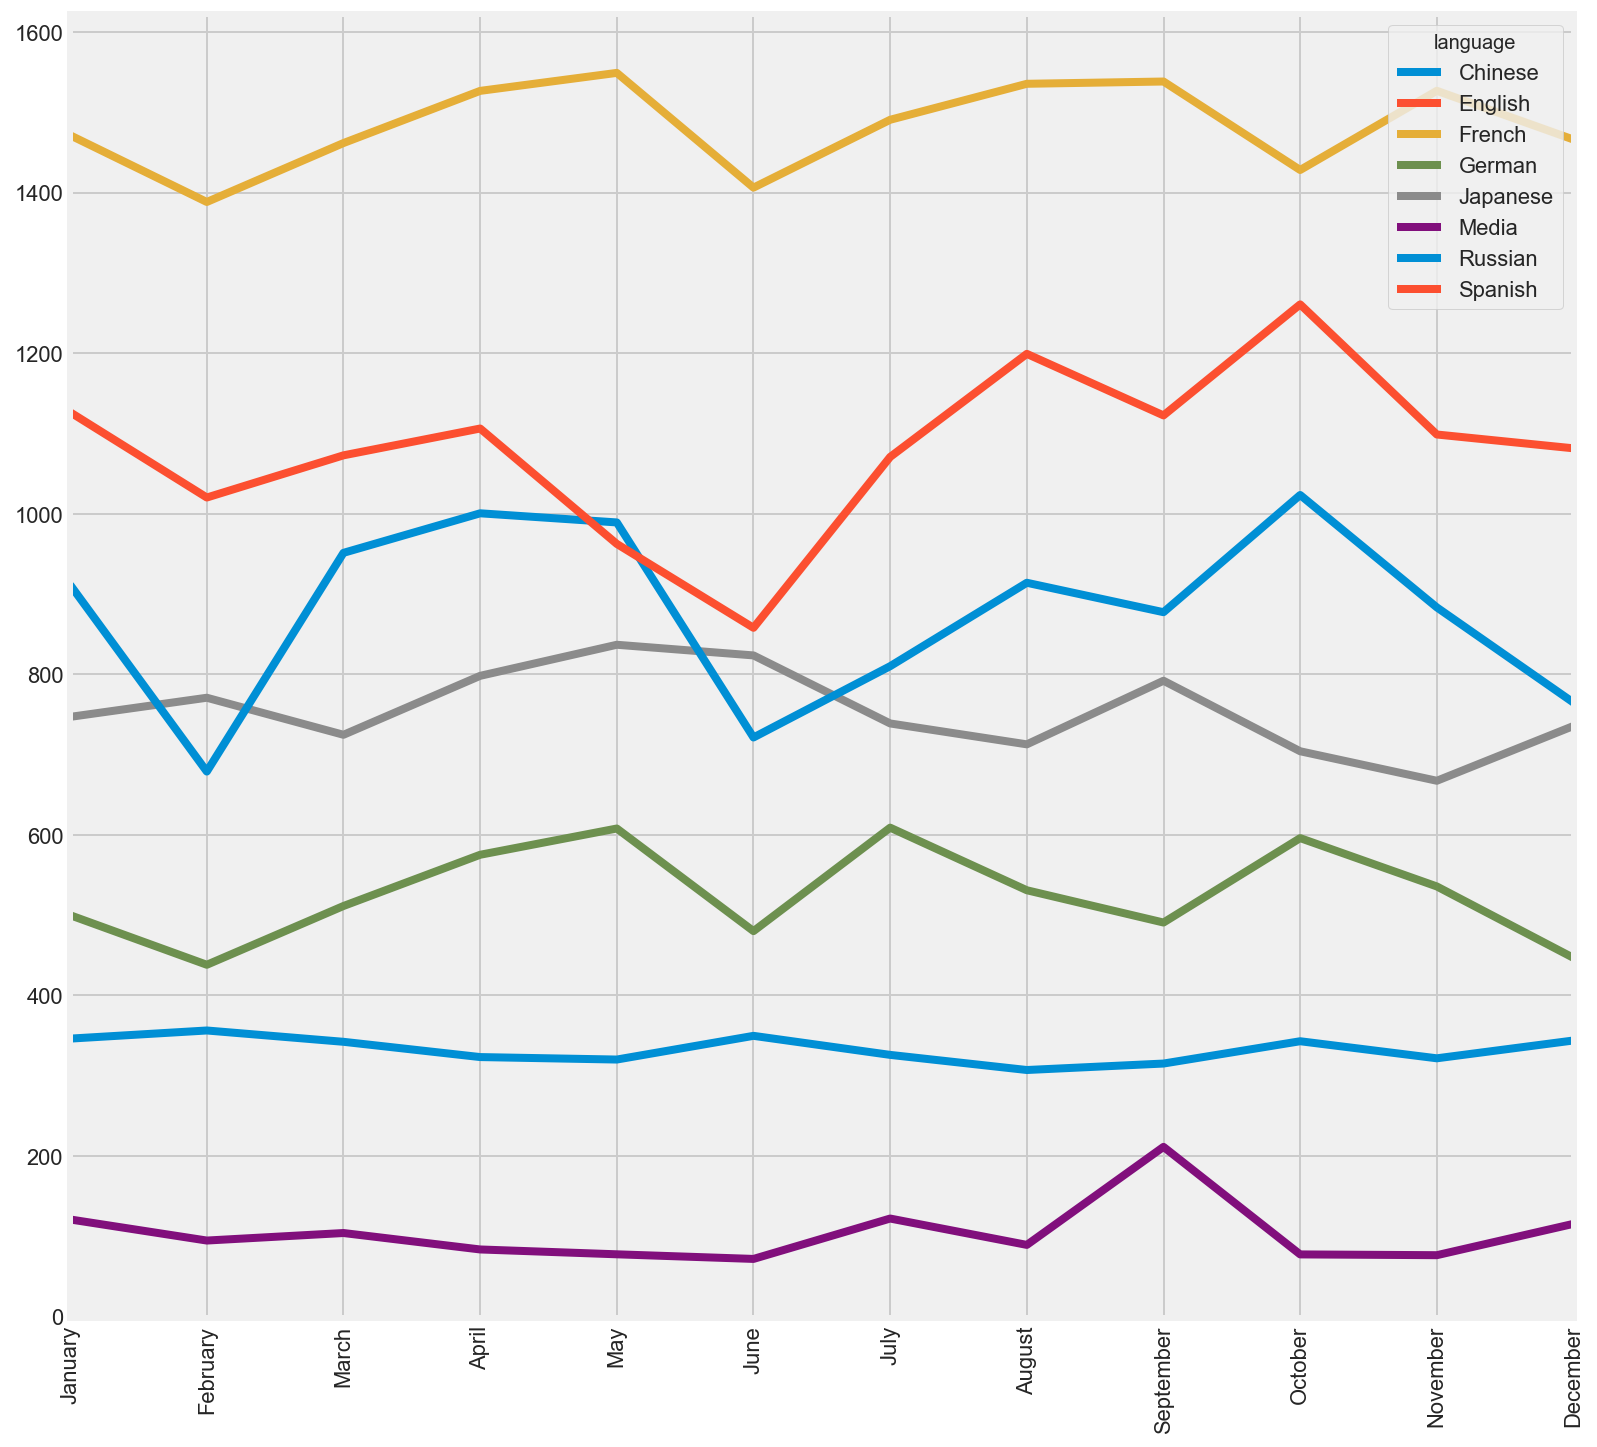

In [25]:
ax = df.query("""language != 'English'""")\
.groupby(['month_name', 'language'])['visits'].mean().unstack()\
.reset_index(drop=True).plot(figsize=(12,12), logy=False )

plt.xticks(range(12), rotation=90)
ax.set_xticklabels(df['month_name'].unique());

## Timeseries per language

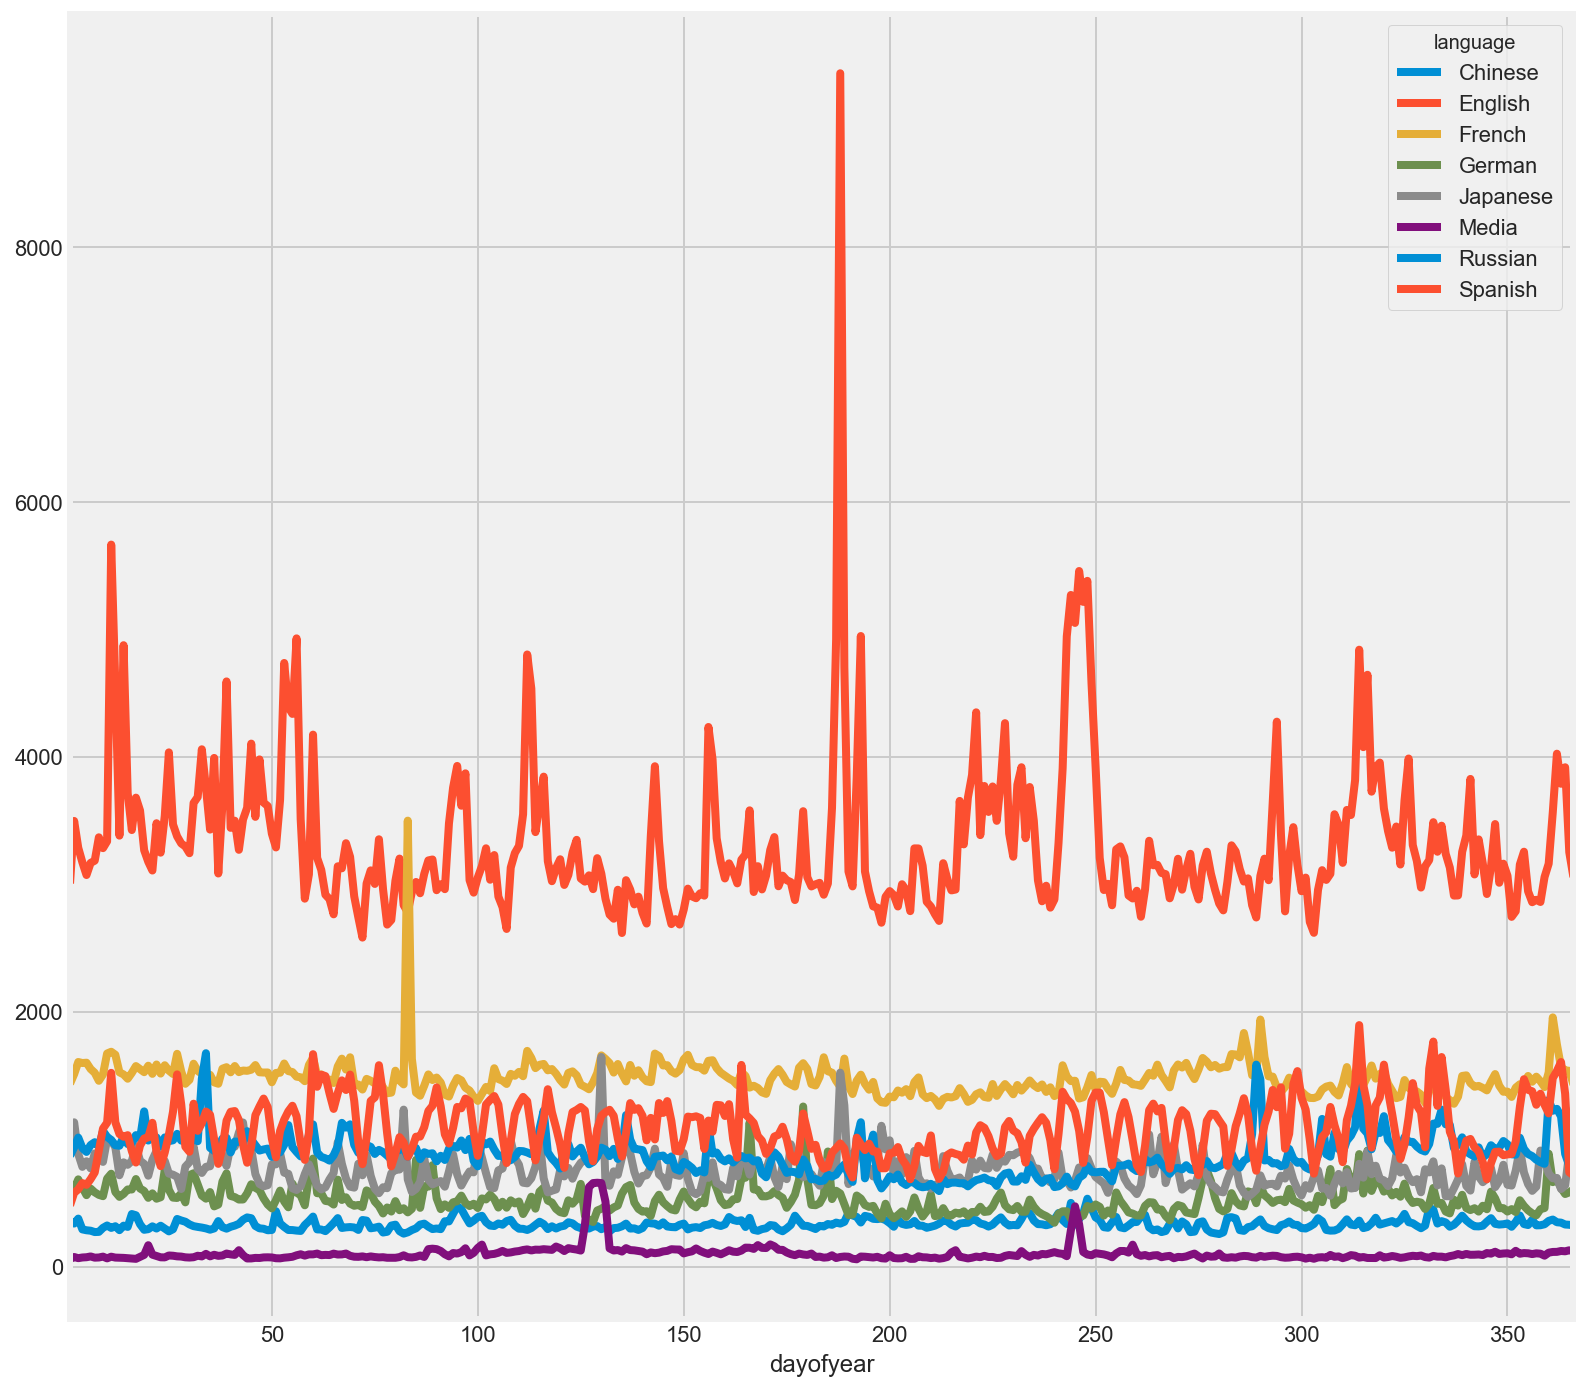

In [26]:
df.groupby(['dayofyear', 'language'])['visits'].mean().unstack().plot(figsize=(12,12))
plt.savefig('../reports/figures/daily_visits.png',dpi=300)

CPU times: user 2min 10s, sys: 1.6 s, total: 2min 12s
Wall time: 2min 27s


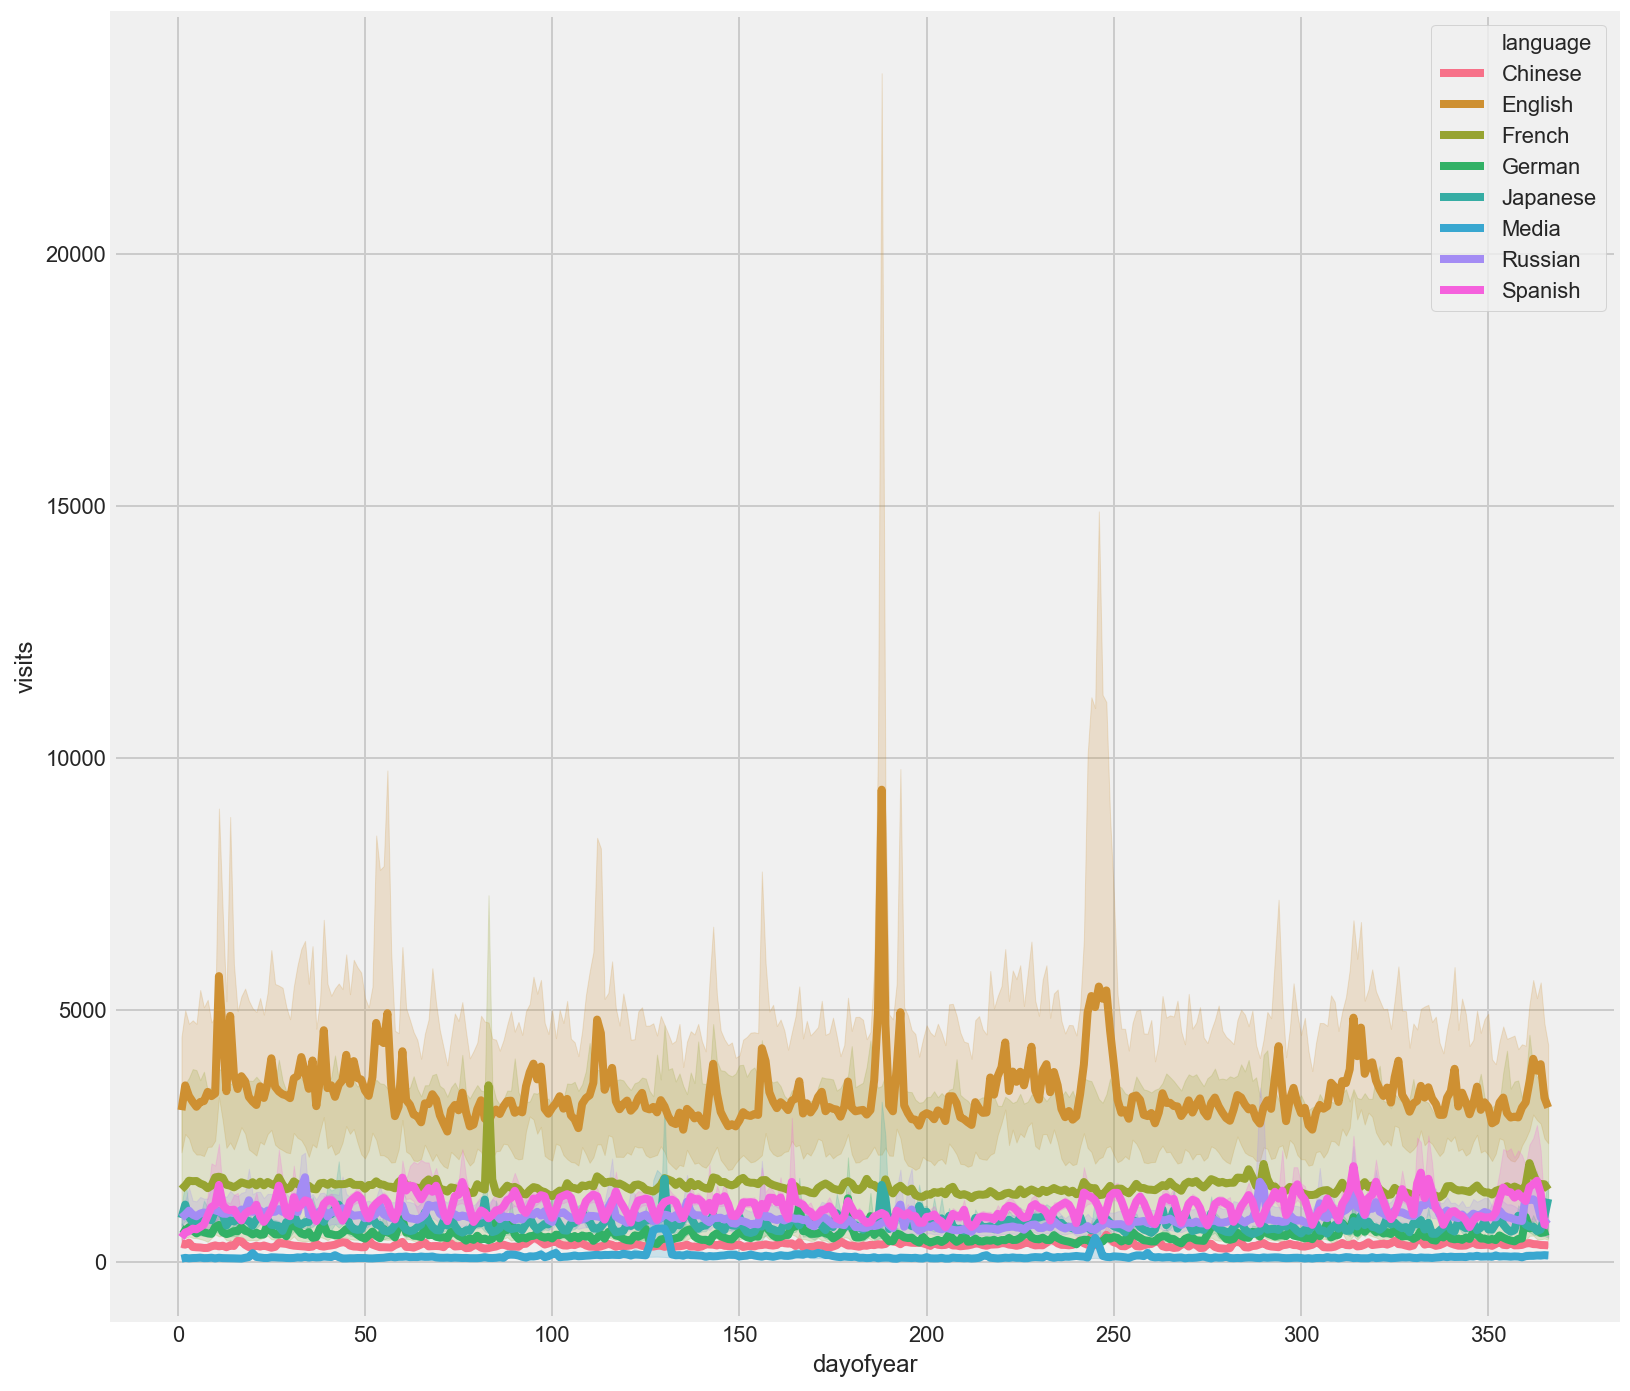

In [28]:
%%time
# plt.figure(figsize=(12,12))
# sns.lineplot(x='dayofyear',y='visits',hue='language',data=df)

# Wall time: 2min 27s

## Page Visits per Week Day

In [128]:
df['day_name'].unique().categories

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

CPU times: user 1min 16s, sys: 1.44 s, total: 1min 17s
Wall time: 1min 19s


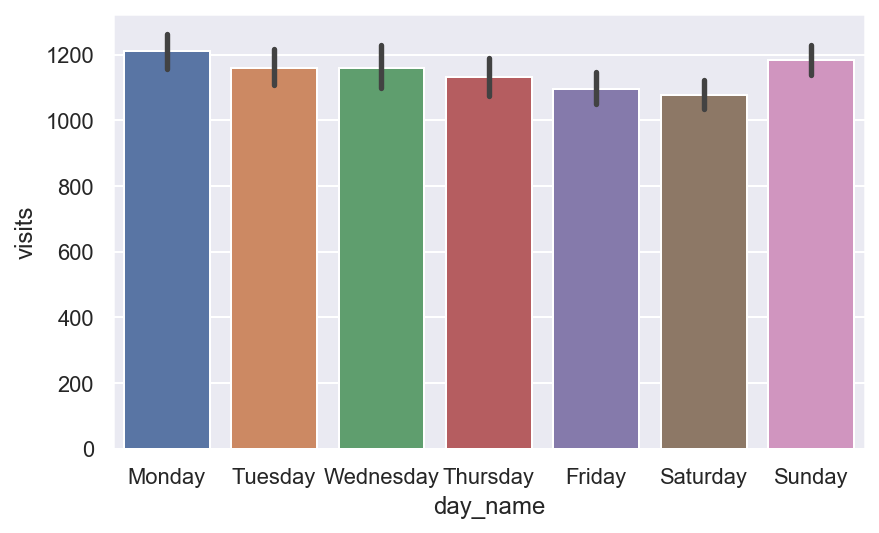

In [129]:
%%time
sns.barplot(x='day_name',y='visits',data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'])

CPU times: user 75.7 ms, sys: 6.9 ms, total: 82.6 ms
Wall time: 91.3 ms


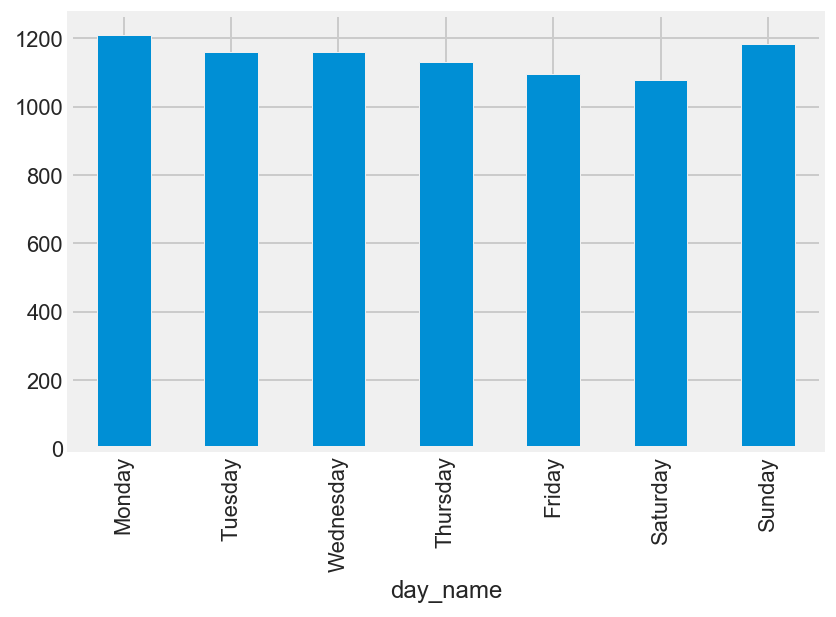

In [77]:
%%time
df.groupby('day_name')['visits'].mean().sort_index().plot.bar()

CPU times: user 69 ms, sys: 8.23 ms, total: 77.3 ms
Wall time: 88.9 ms


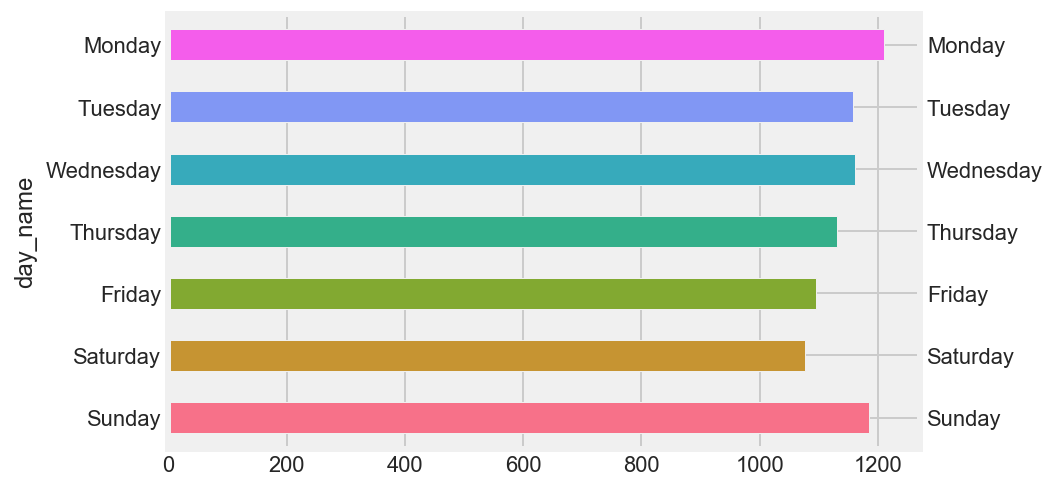

In [89]:
%%time
ax = df.groupby('day_name')['visits'].mean().sort_index(ascending=False)\
.plot.barh(use_index=True, color=sns.color_palette('husl',7))


plt.tick_params(axis='y', which='both', labelright='on')

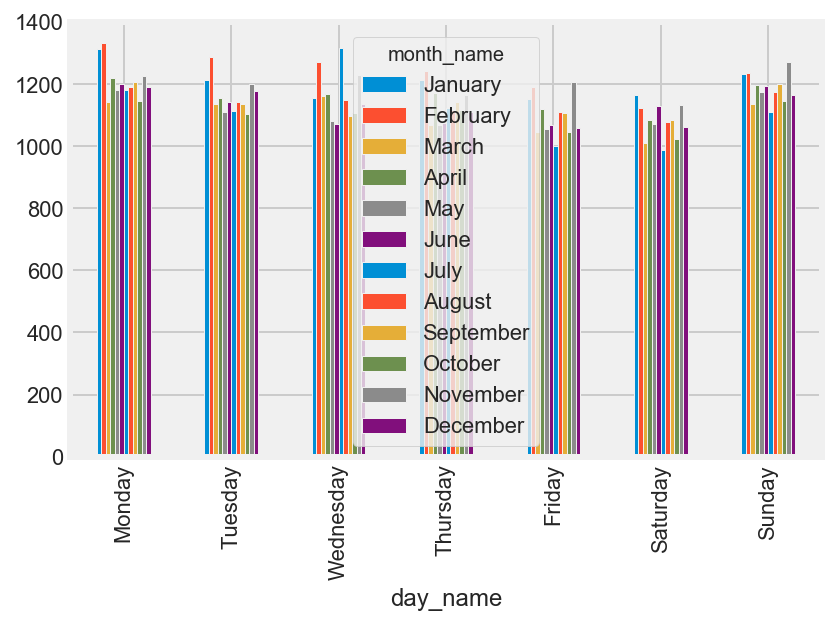

In [99]:
df.groupby(['day_name','month_name'])['visits'].mean().sort_index(ascending=False).unstack().plot.bar()

CPU times: user 17.6 s, sys: 1.08 s, total: 18.7 s
Wall time: 19.1 s


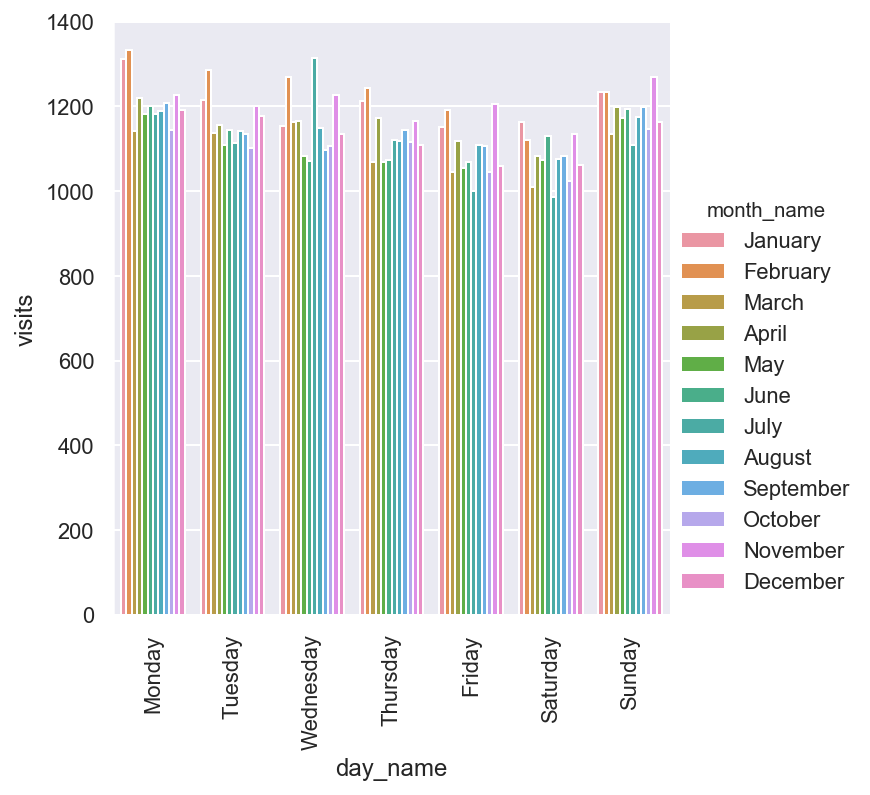

In [141]:
%%time
sns.catplot(data=df, kind='bar',ci=None,
            x='day_name',y='visits',hue='month_name')
plt.xticks(rotation=90)

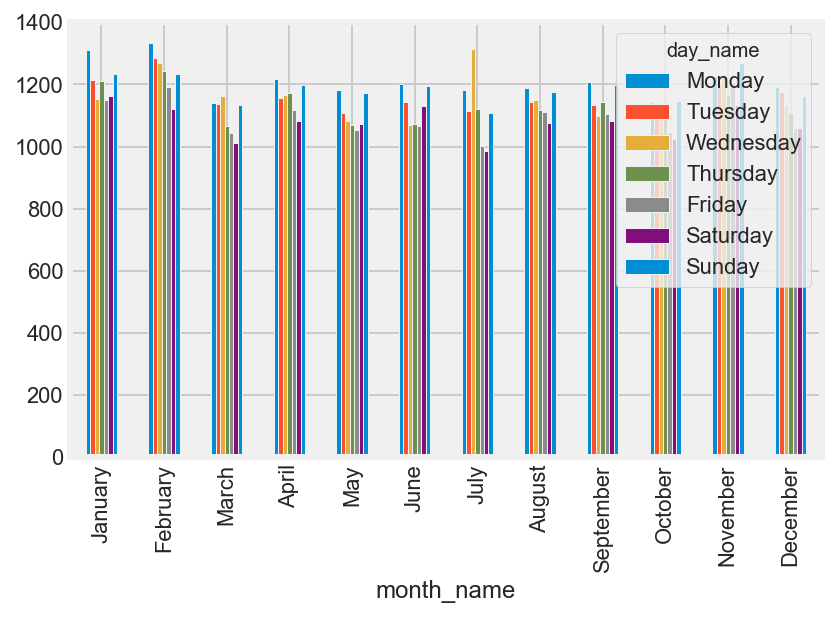

In [101]:
df.groupby(['day_name','month_name'])['visits'].mean().sort_index(ascending=False).unstack(0).plot.bar()

## Page Visits per Month Day

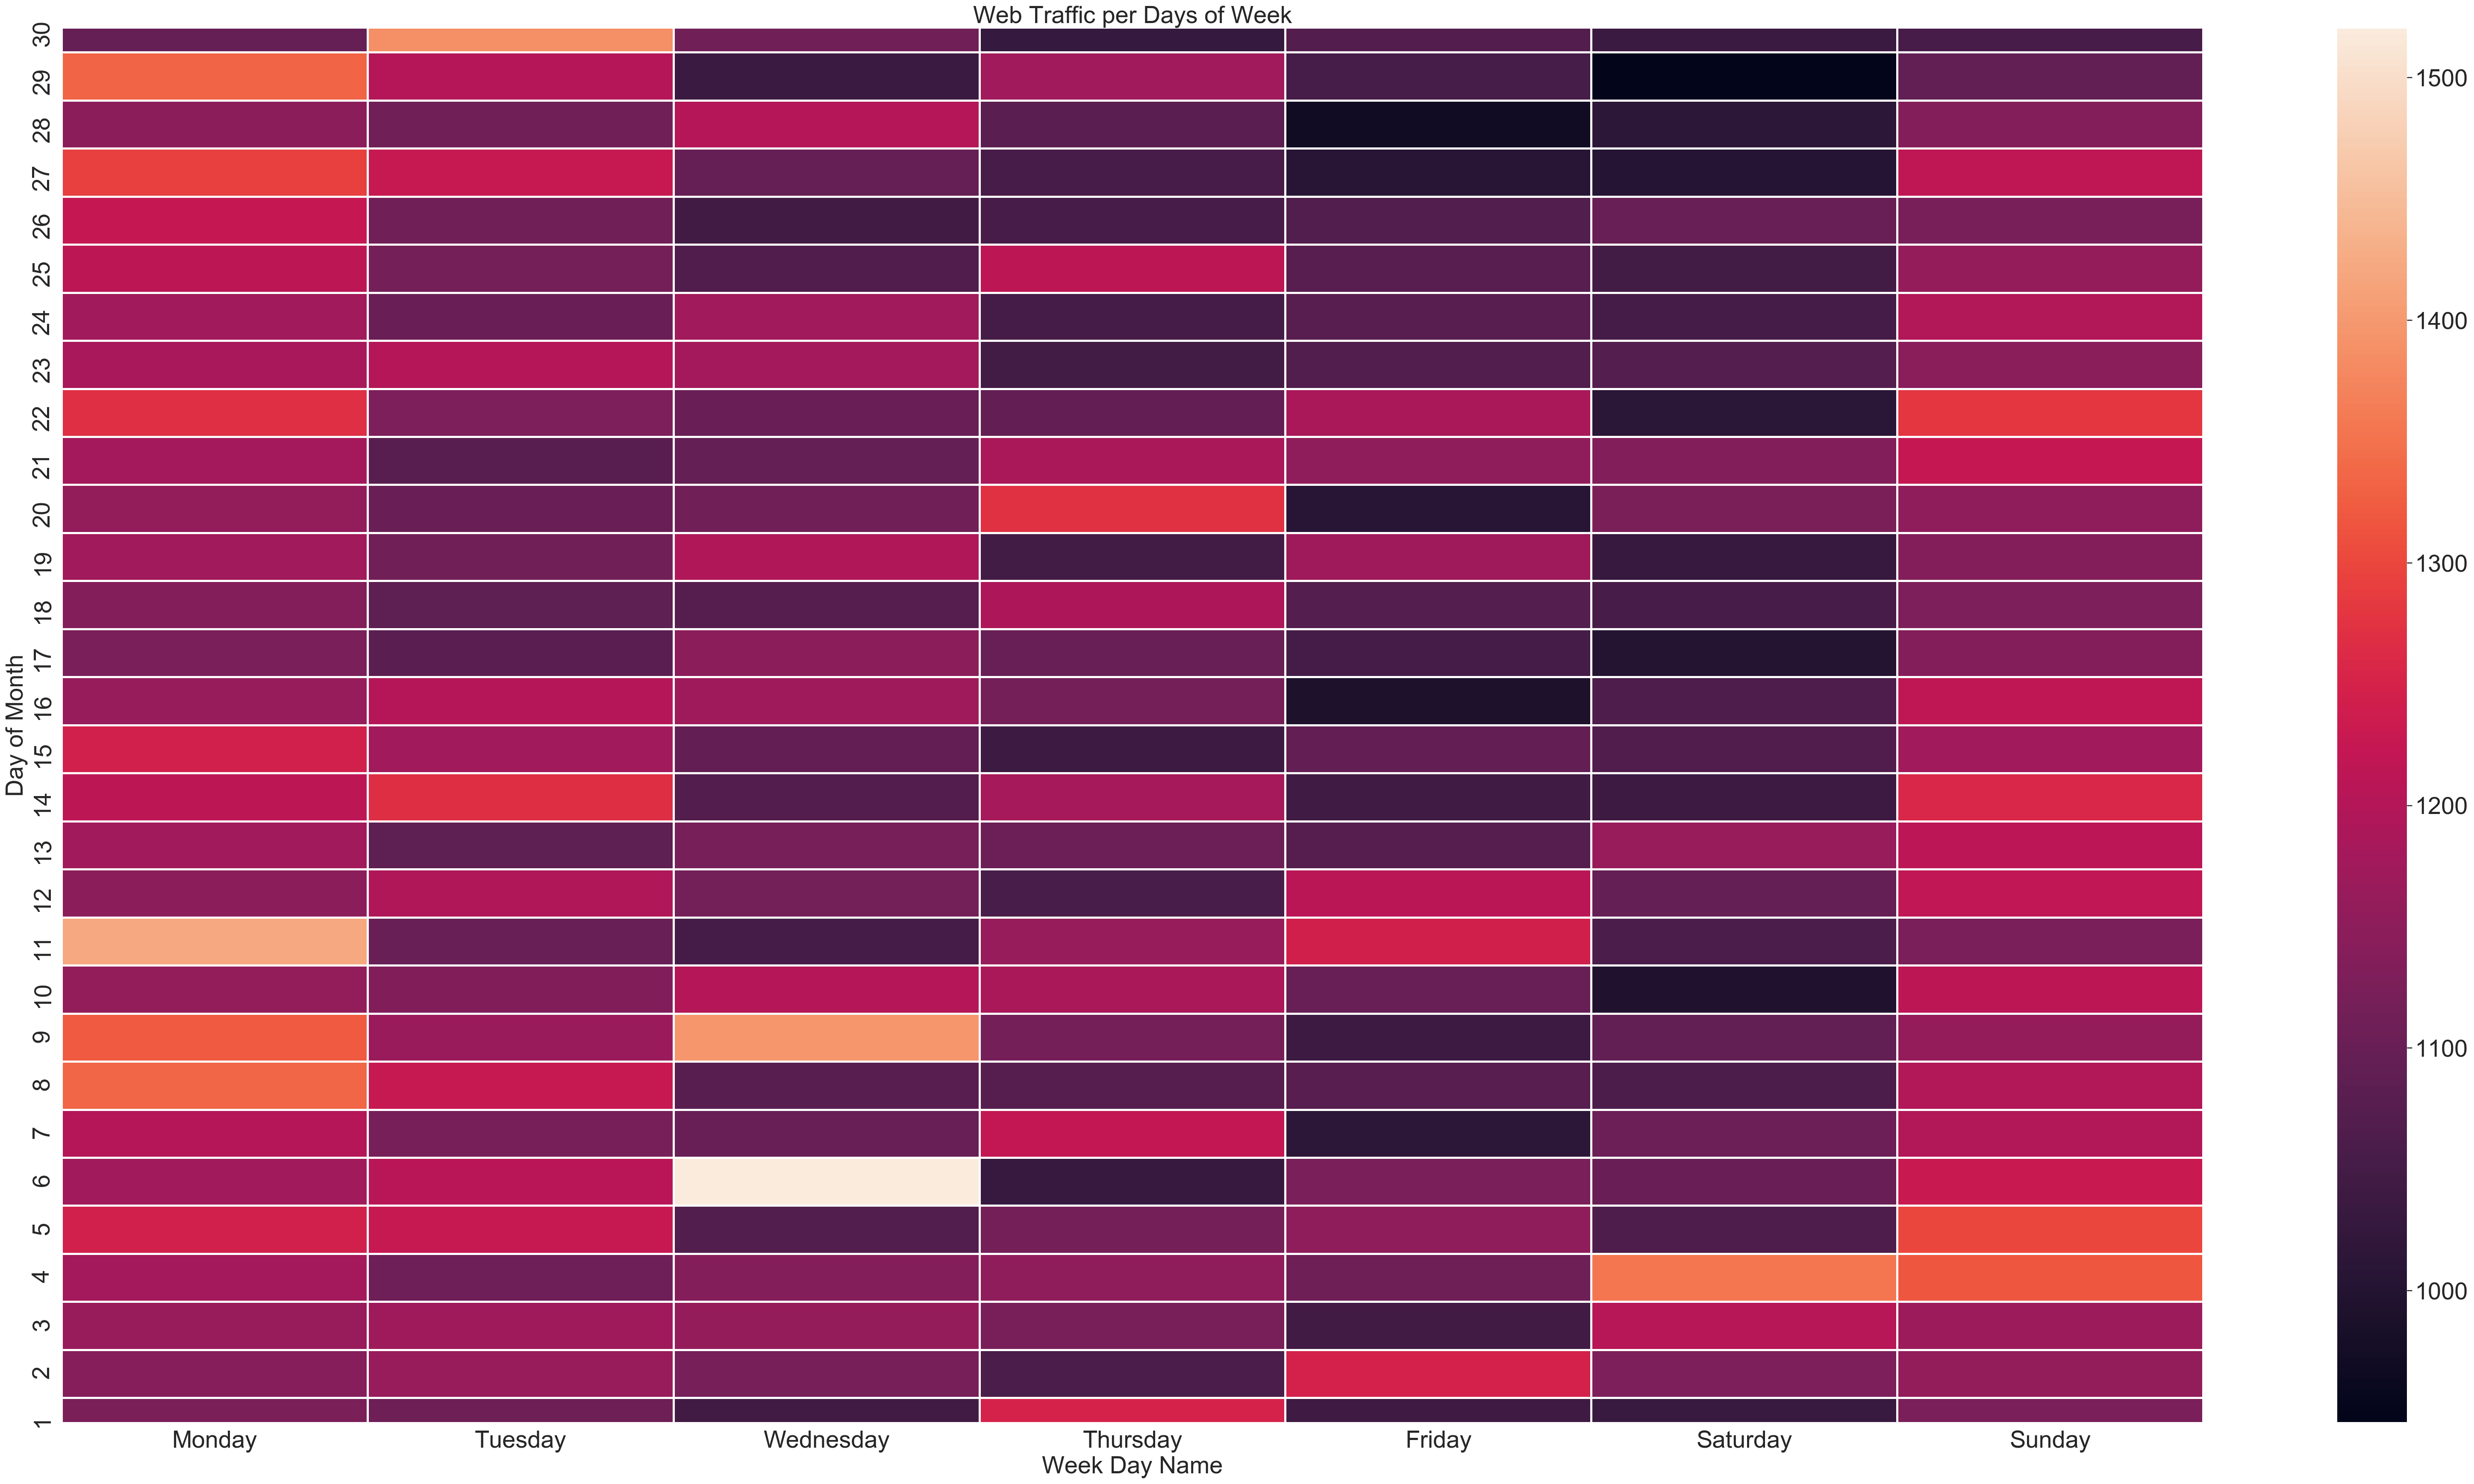

In [124]:
df1 = df.groupby(["day_name", "day"])['visits'].mean().reset_index()\
.pivot('day','day_name','visits').dropna()

fig, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(data=df1, annot=False, ax=ax, fmt="d", linewidths=2).invert_yaxis()
plt.title('Web Traffic per Days of Week',fontsize=28)

plt.xlabel('Week Day Name', fontsize=28)
plt.ylabel('Day of Month', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

plt.show()

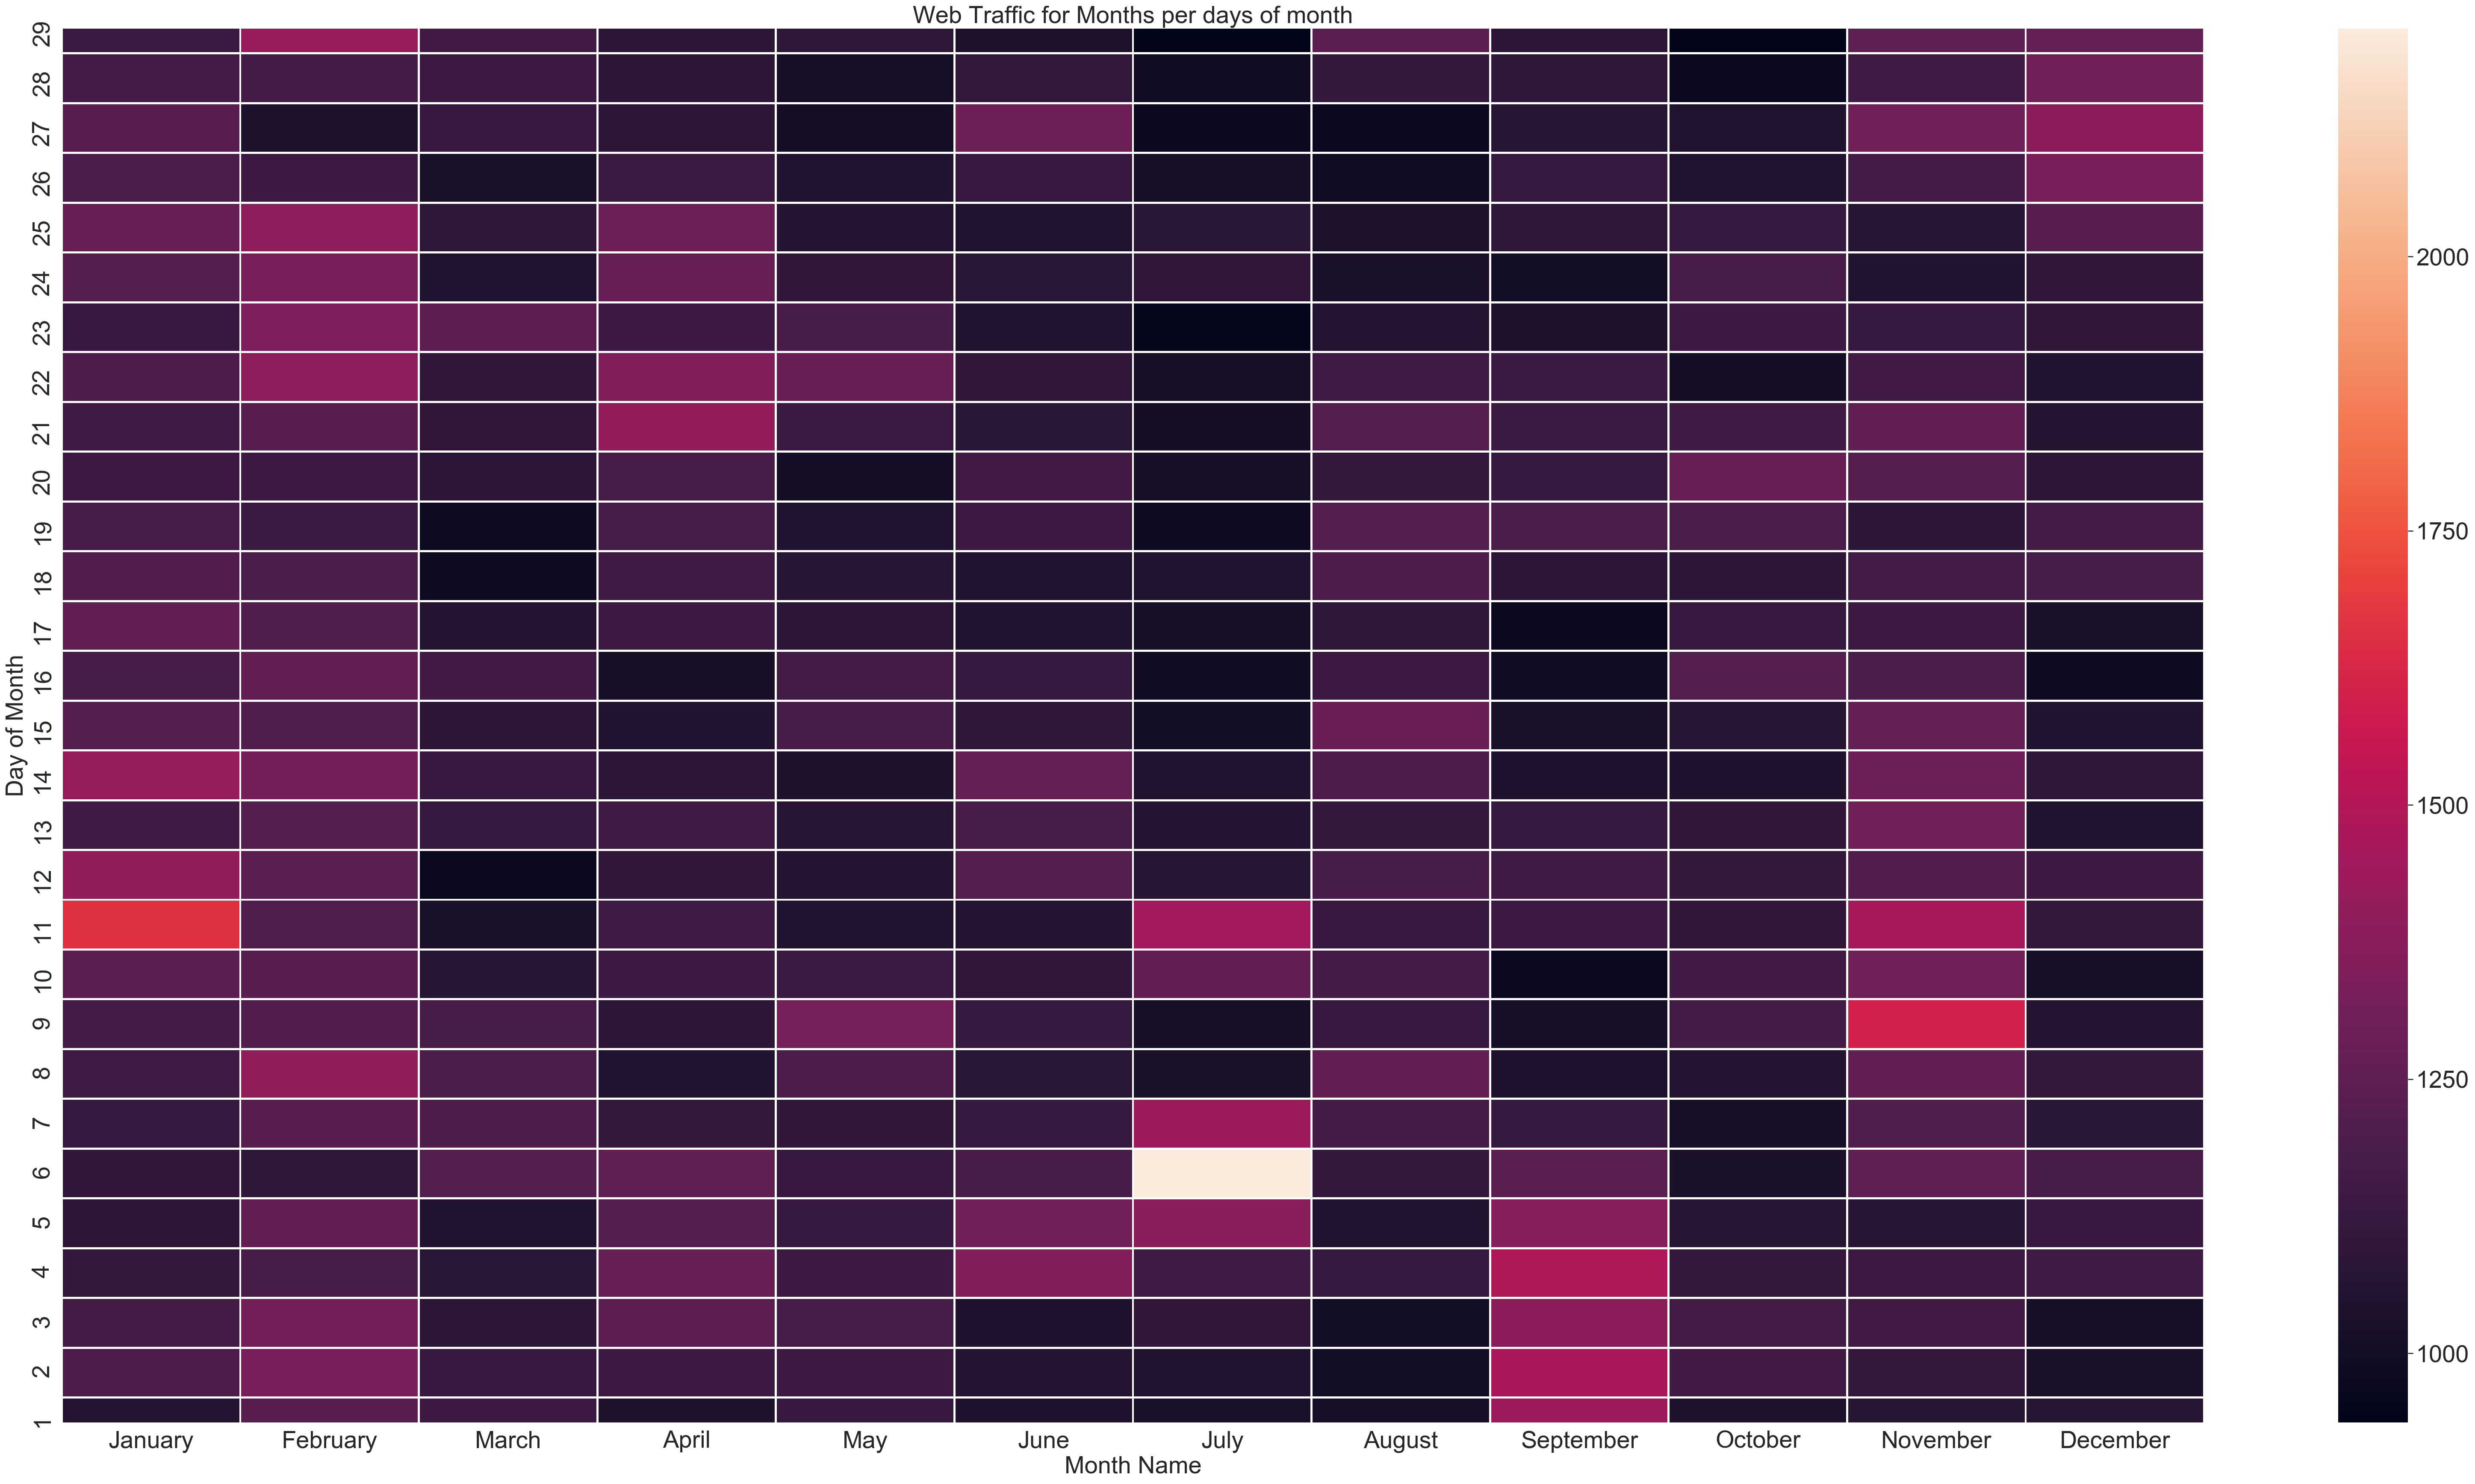

In [125]:
df1 = df.groupby(["month_name", "day"])['visits'].mean().reset_index()\
.pivot('day','month_name','visits').dropna()

fig, ax = plt.subplots(figsize=(50, 30))
# sns.set(font_scale=3)
sns.heatmap(data=df1, annot=False, ax=ax, fmt="d", linewidths=2).invert_yaxis()
plt.title('Web Traffic for Months per days of month',fontsize=28)

plt.xlabel('Month Name', fontsize=28)
plt.ylabel('Day of Month', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

plt.show()

## Fast Fourier Transform (FFT)

Resources:
- https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/
- https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration

Here we can that the plots seems periodic in nature in time domain.
We can work in the frequency domain using FFT transformation of the time series.
Peaks in the FFT show us the strongest frequencies in the periodic signal.

The Fourier transform is an alternative representation of a signal as a superposition of periodic components. It is an important mathematical result that any well-behaved function can be represented under this form. Whereas a time-varying signal is most naturally considered as a function of time, the Fourier transform represents it as a function of the frequency. A magnitude and a phase, which are both encoded in a single complex number, are associated to each frequency.

**The Discrete Fourier Transform**  
Let's consider a digital signal x represented by a vector $(x0,...,xN−1)$. We assume that this signal is regularly sampled. The Discrete Fourier Transform (DFT) of x is $X=(X0,...,XN−1)$ defined as:

$$
\forall k \in\{0, \ldots, N-1\}, \quad X_{k}=\sum_{n=0}^{N-1} x_{n} e^{-2\  i \pi k\  n / N}
$$

The DFT can be computed efficiently with the Fast Fourier Transform (FFT), an algorithm that exploits symmetries and redundancies in this definition to considerably speed up the computation. The complexity of the FFT is $O(NlogN)$ instead of $O(N^2)$ for the naive DFT. The FFT is one of the most important algorithms of the digital universe.


In [43]:
days = df['dayofyear'].unique()

In [40]:
df_daily = df.groupby(['dayofyear', 'language'])['visits'].mean().unstack()
df_daily.head()

language      Chinese      English       French      German     Japanese  \
dayofyear                                                                  
1          357.400689  3007.226039  1435.950086  654.809043   865.126815   
2          338.280712  3498.513995  1510.561675  609.202660  1133.100678   
3          377.146383  3287.531807  1606.372920  685.334574   884.638916   
4          292.405281  3173.361323  1598.381526  621.768617   783.205227   
5          285.670494  3073.982188  1600.864601  561.303723   826.985963   

language       Media      Russian     Spanish  
dayofyear                                      
1          59.282913   870.183463  480.771676  
2          75.859944   936.125323  579.312861  
3          66.575910  1013.076873  606.973266  
4          72.059384   930.982558  655.987717  
5          74.003361   900.455426  641.997110

In [41]:
df_daily.columns

CategoricalIndex(['Chinese', 'English', 'French', 'German', 'Japanese',
                  'Media', 'Russian', 'Spanish'],
                 categories=['Chinese', 'English', 'French', 'German', 'Japanese', 'Media', 'Russian', 'Spanish'], ordered=False, name='language', dtype='category')

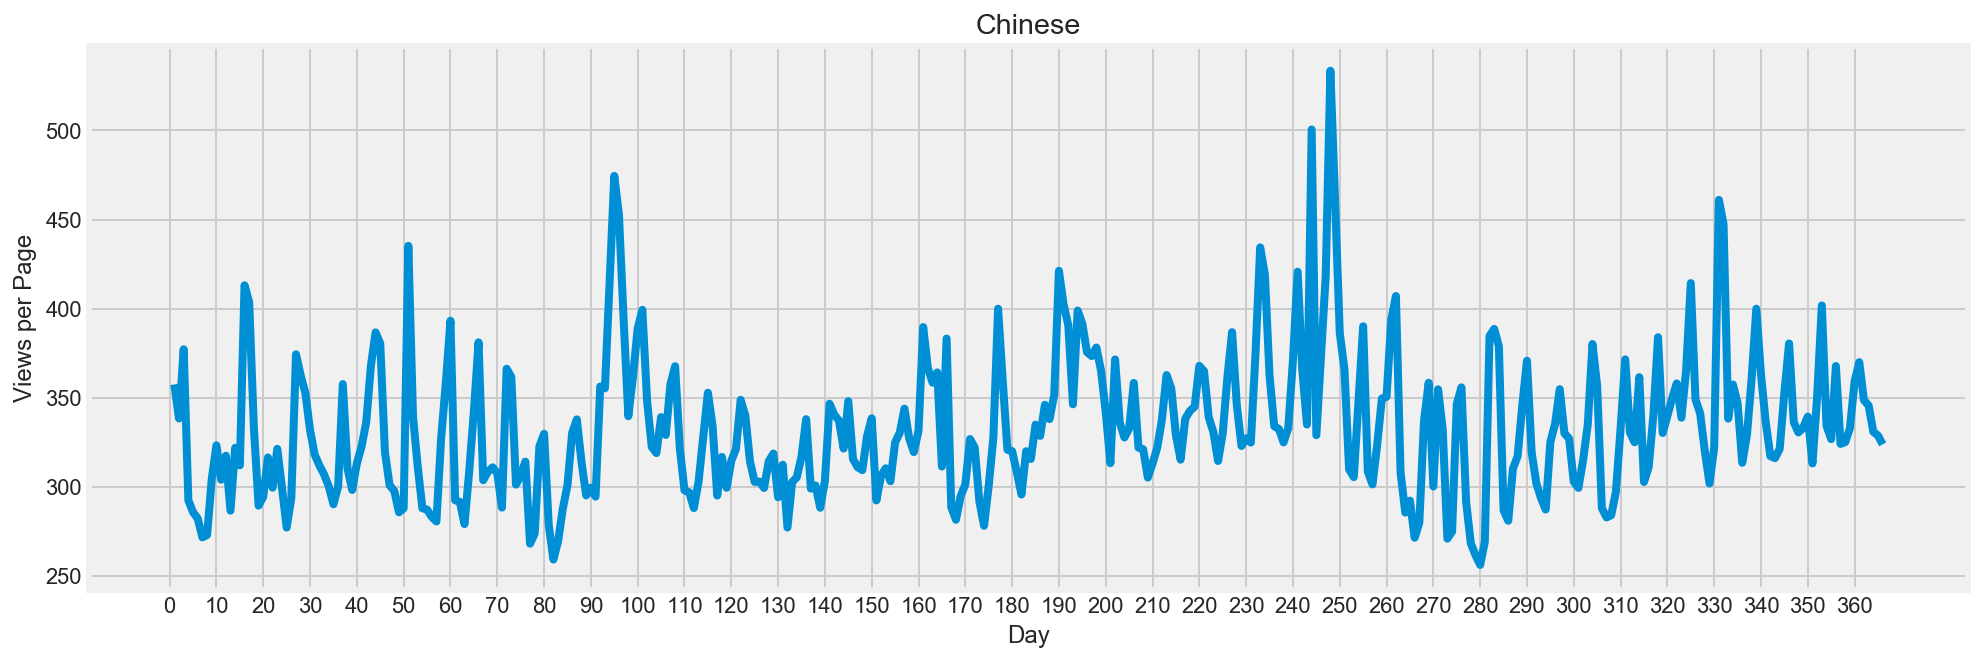

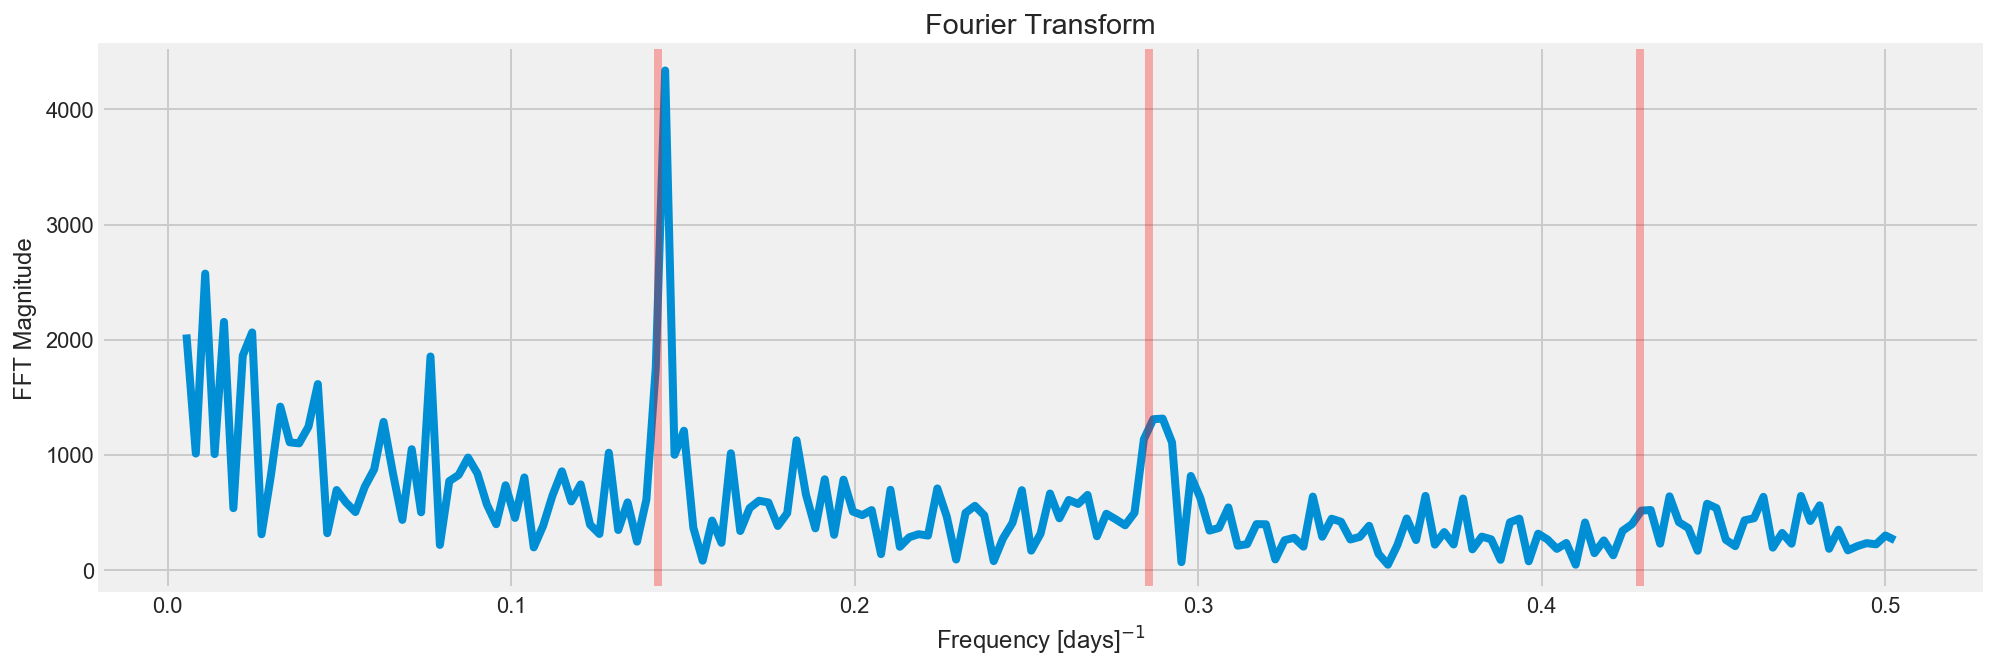

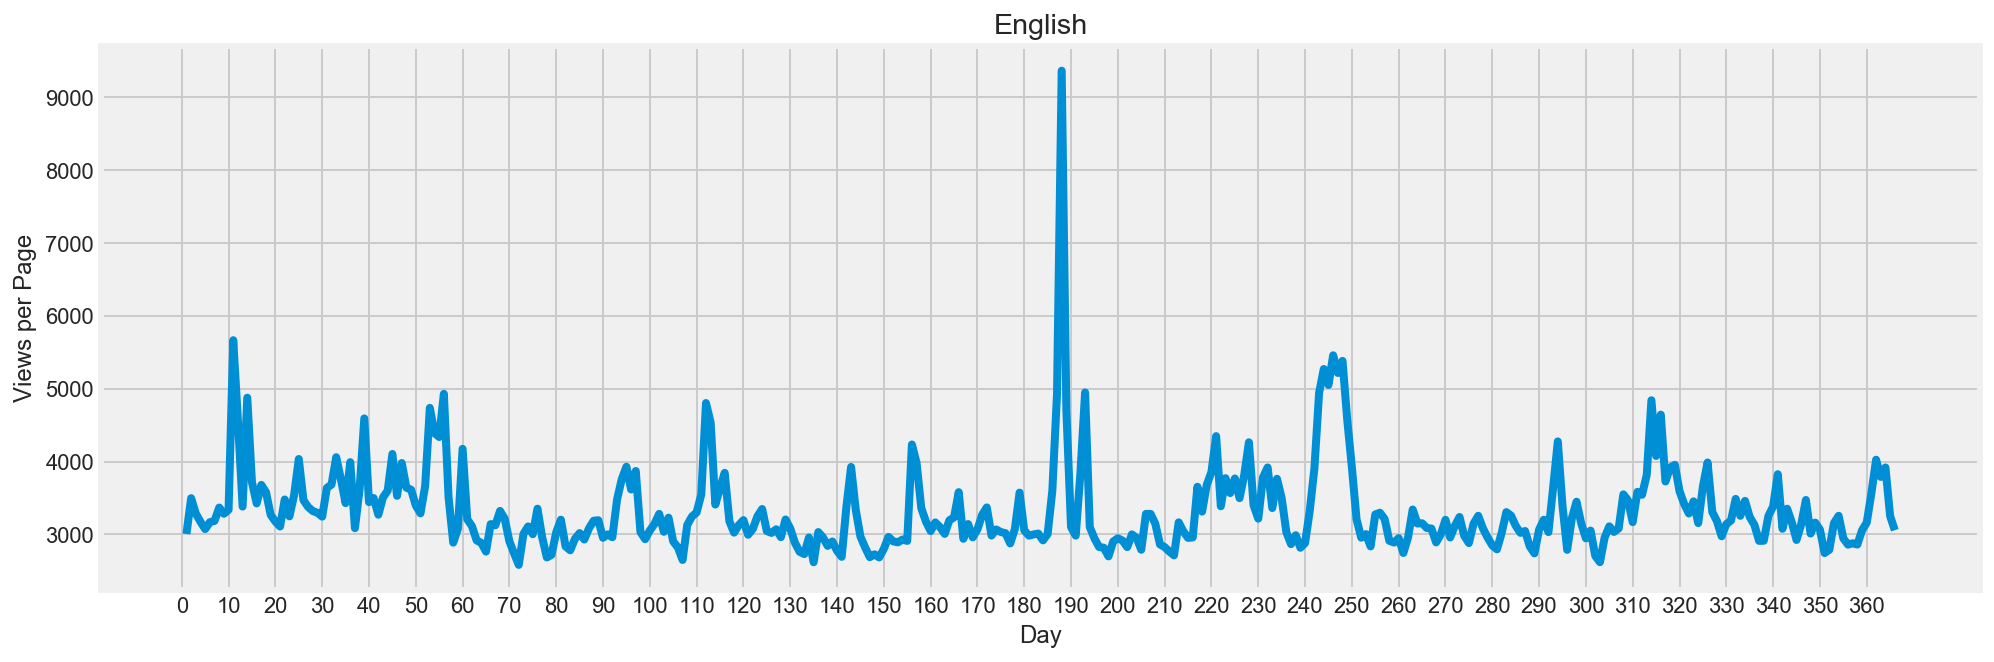

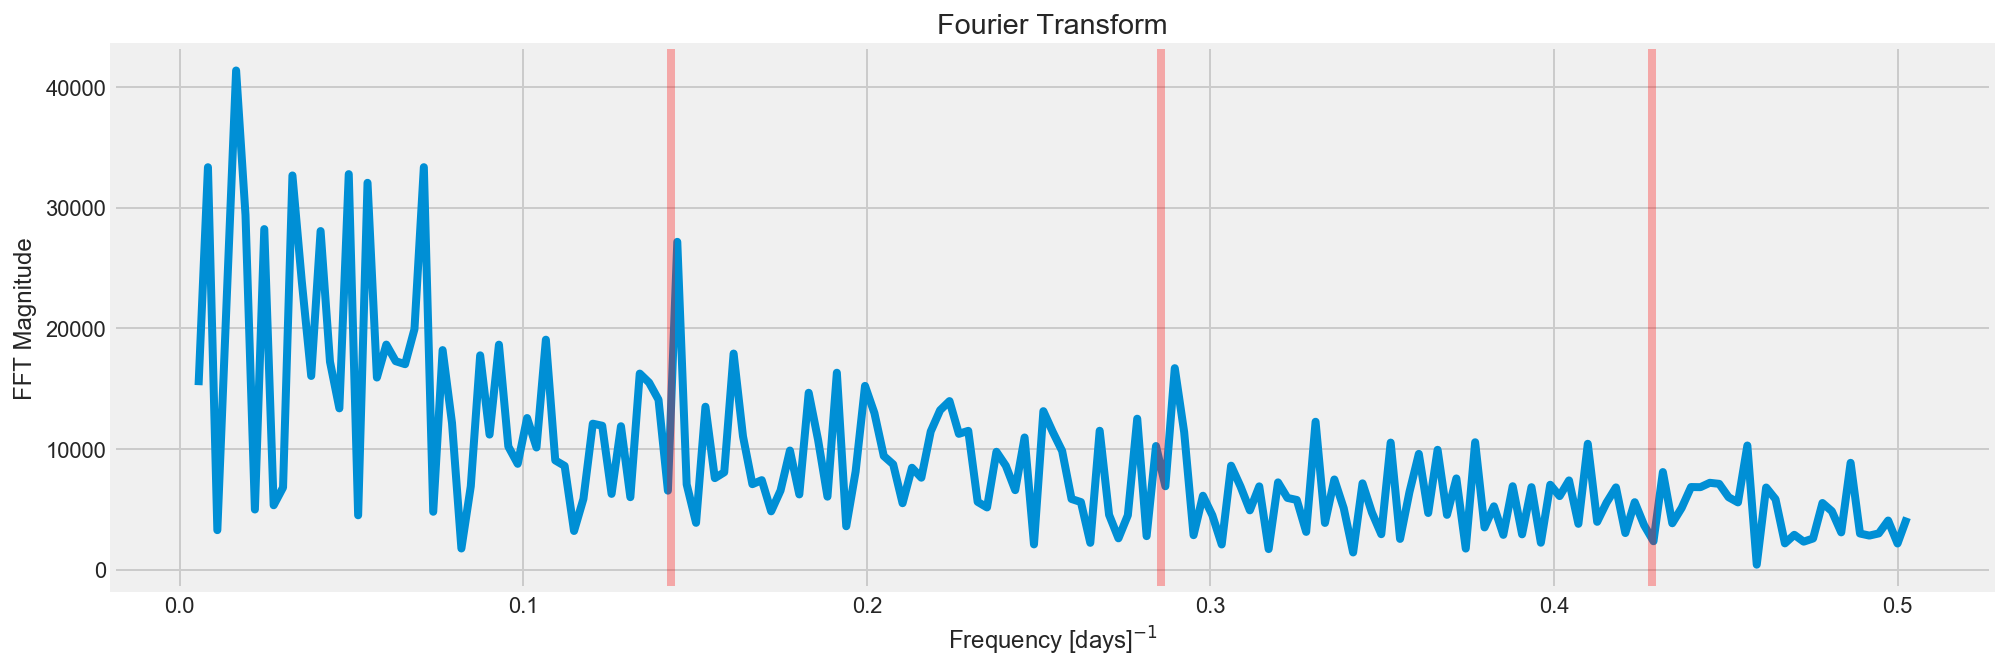

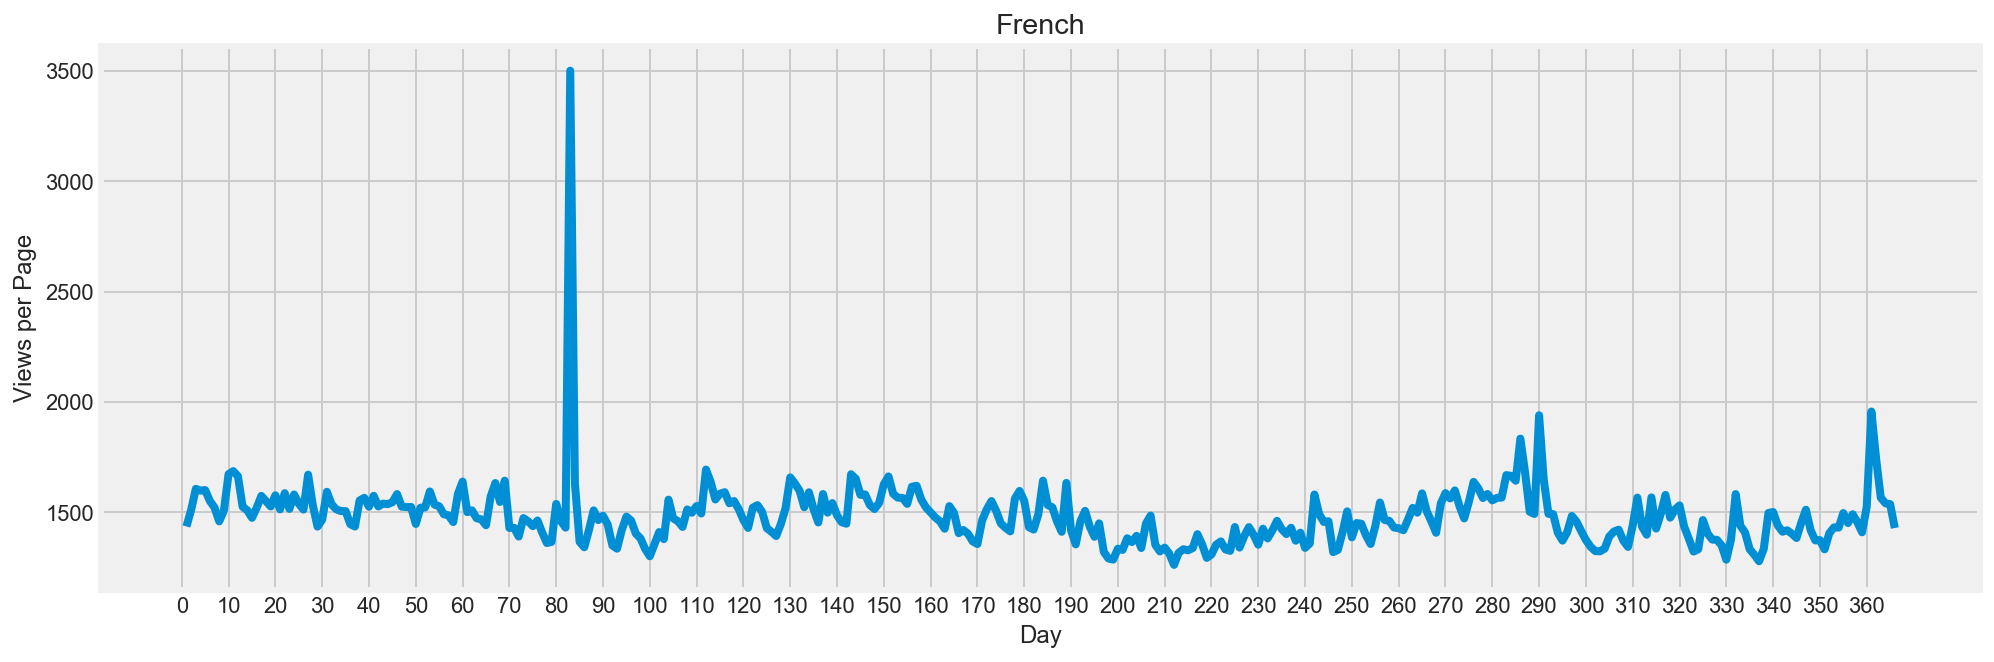

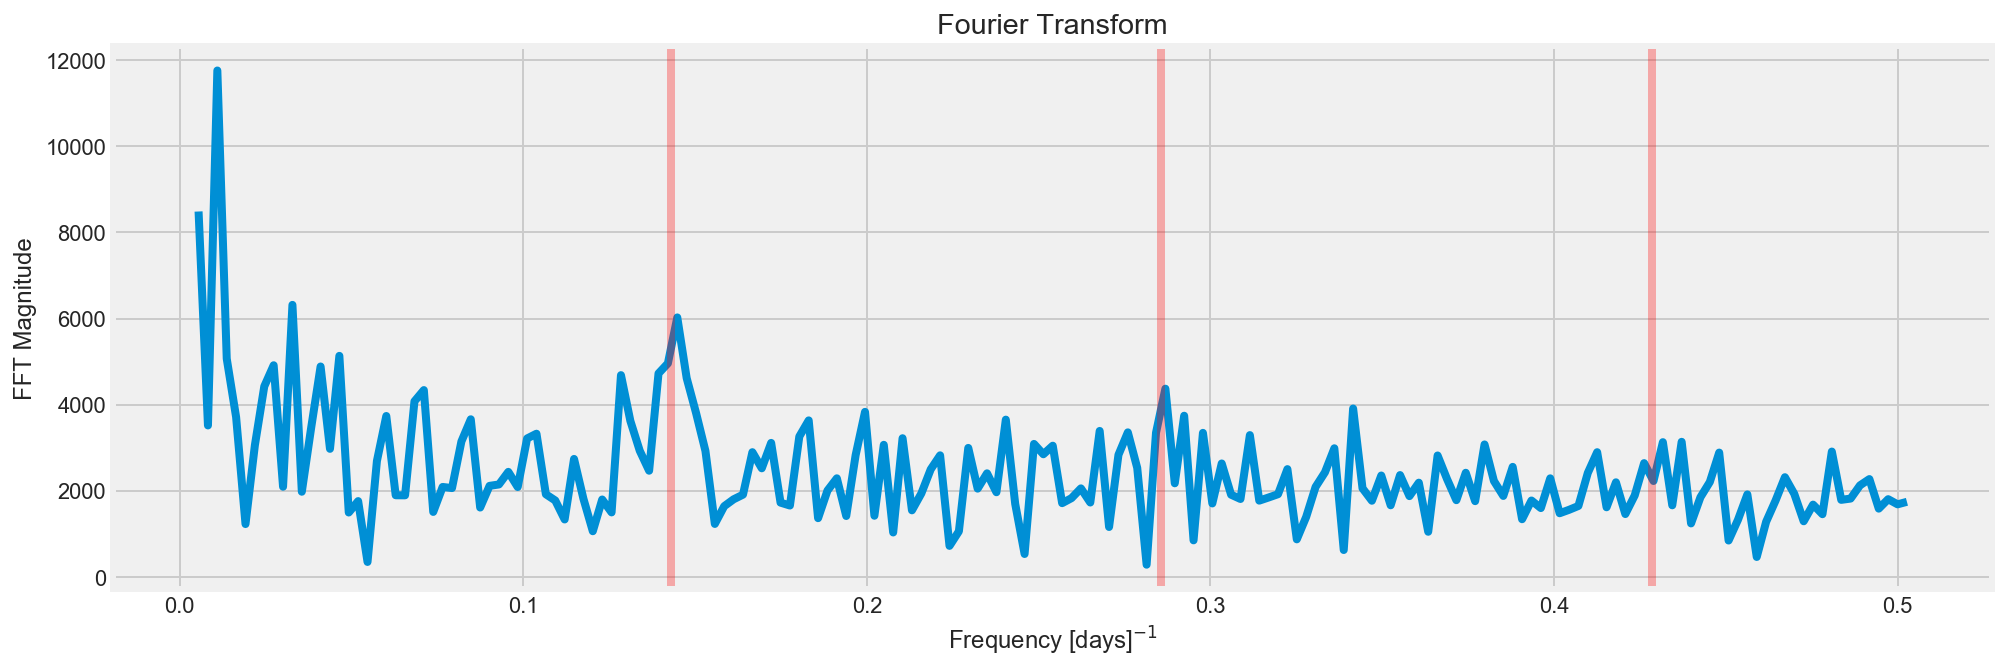

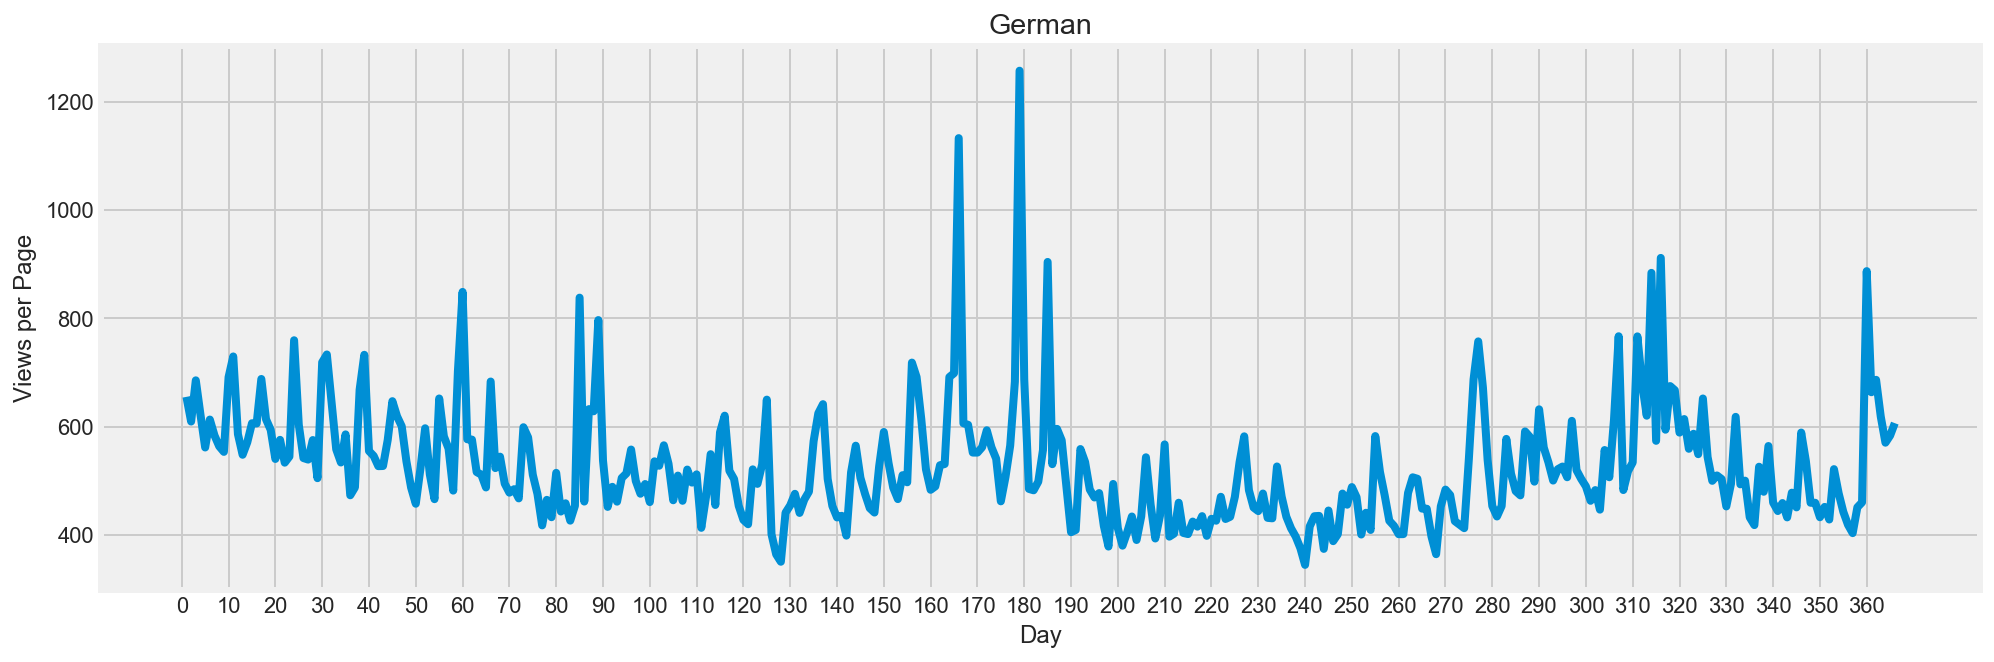

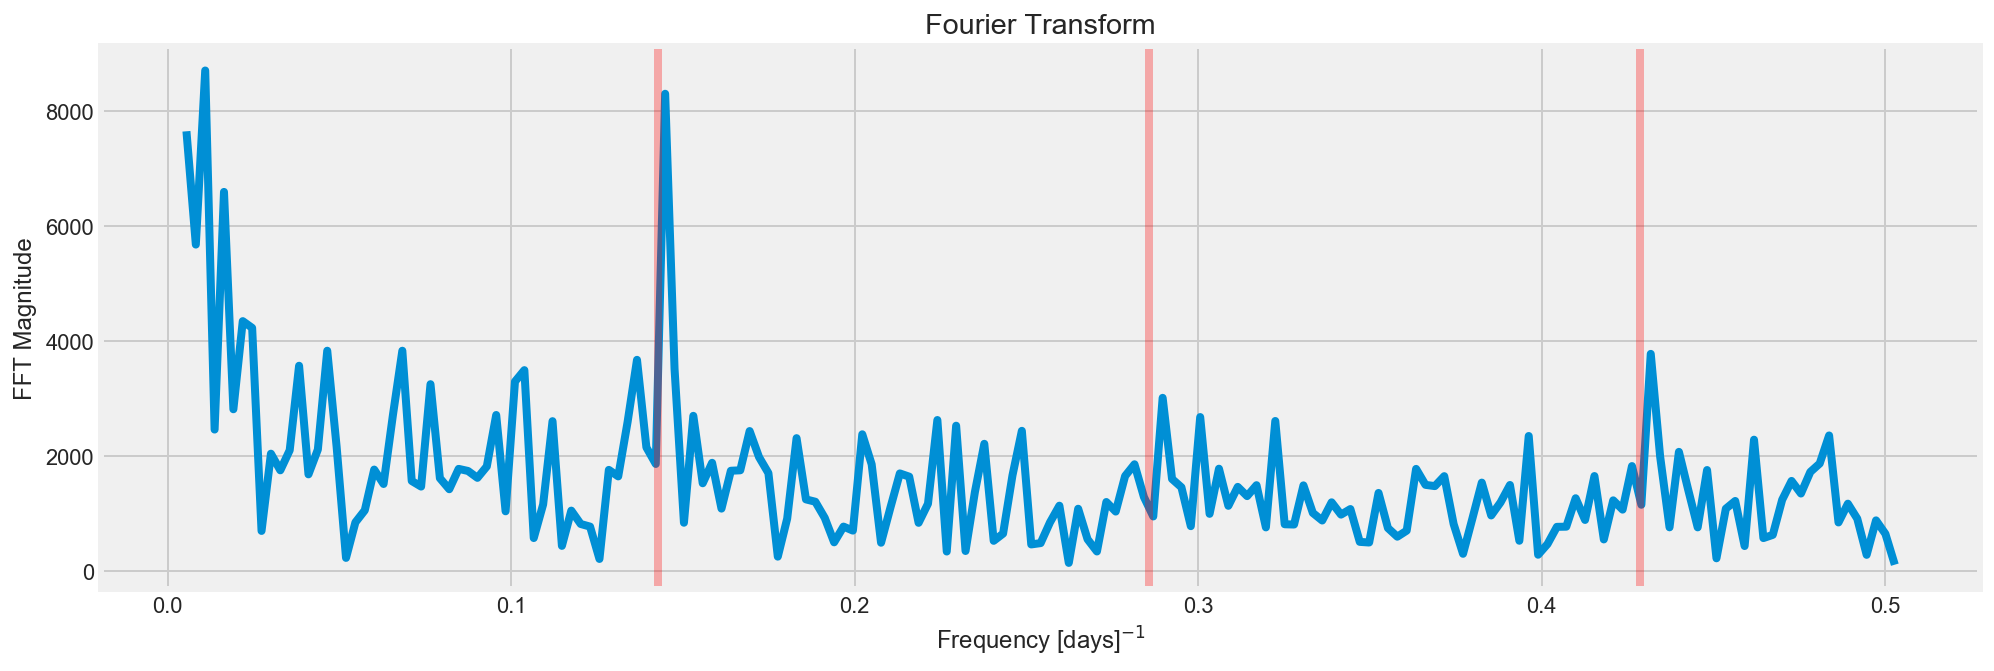

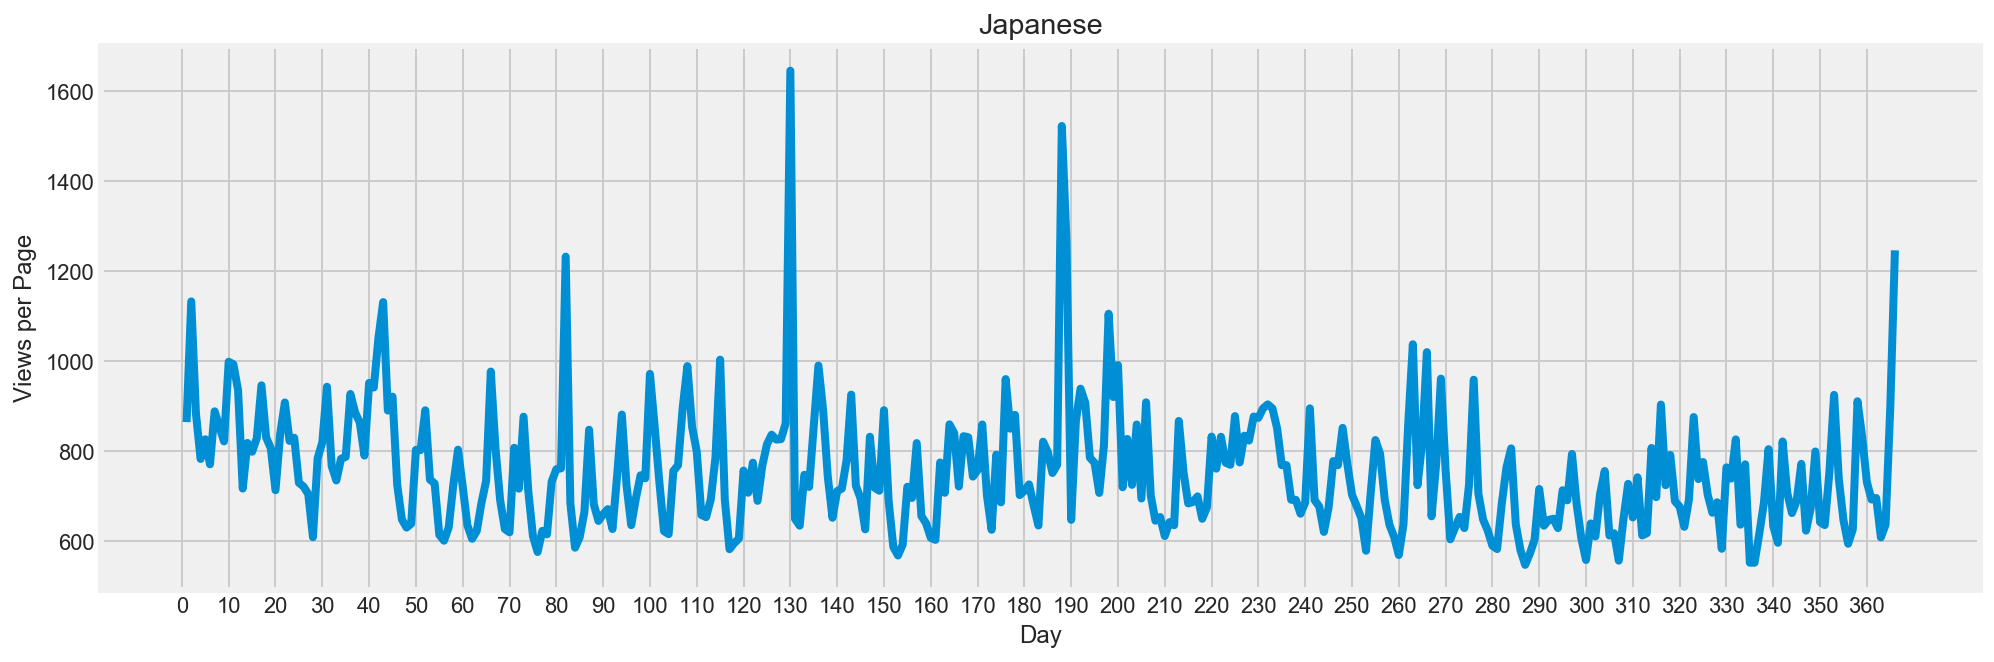

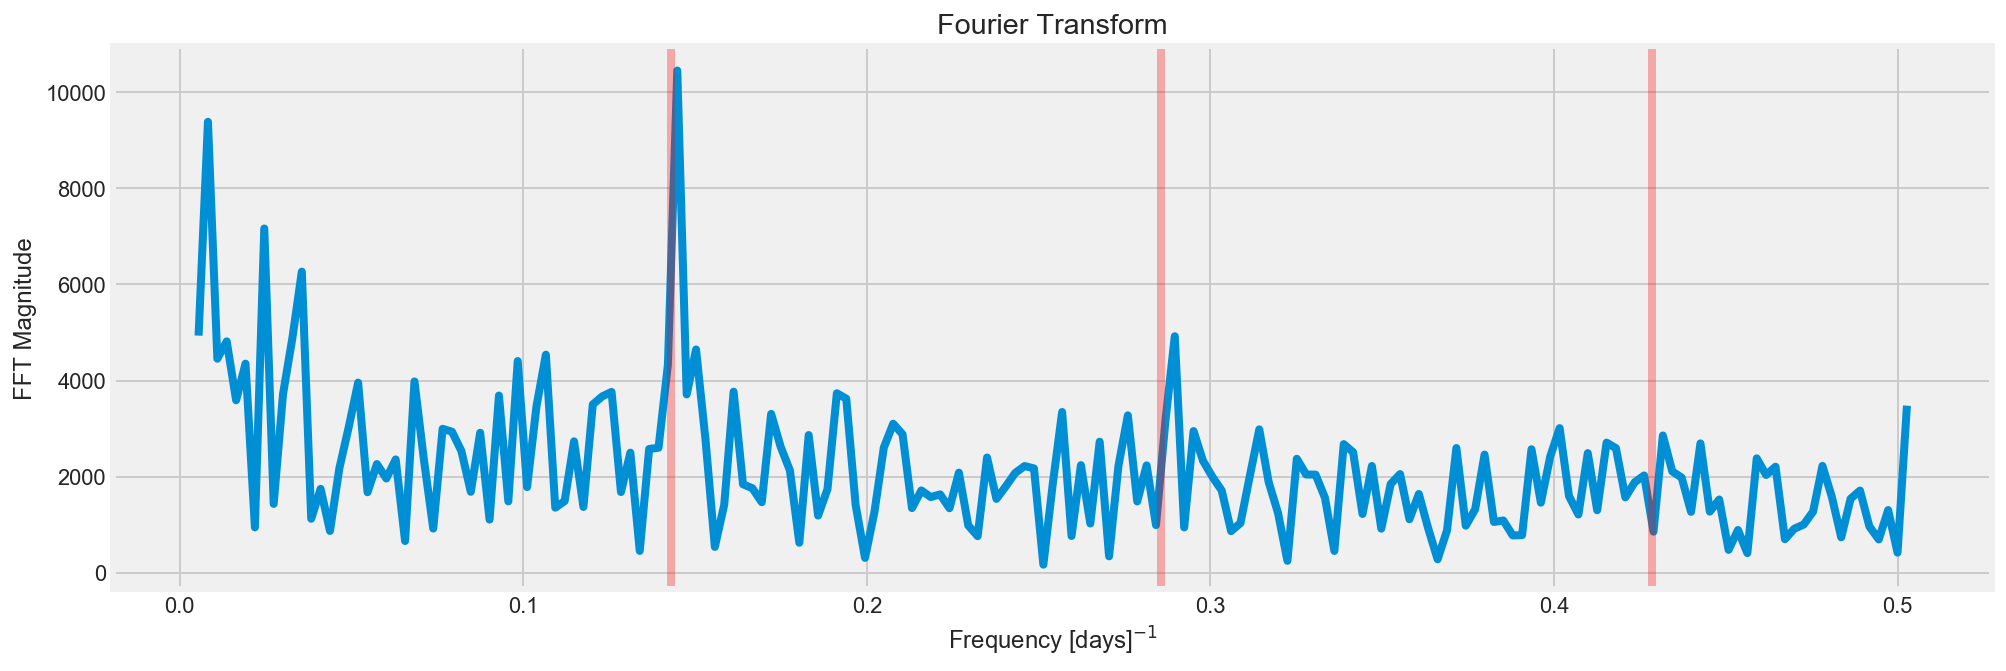

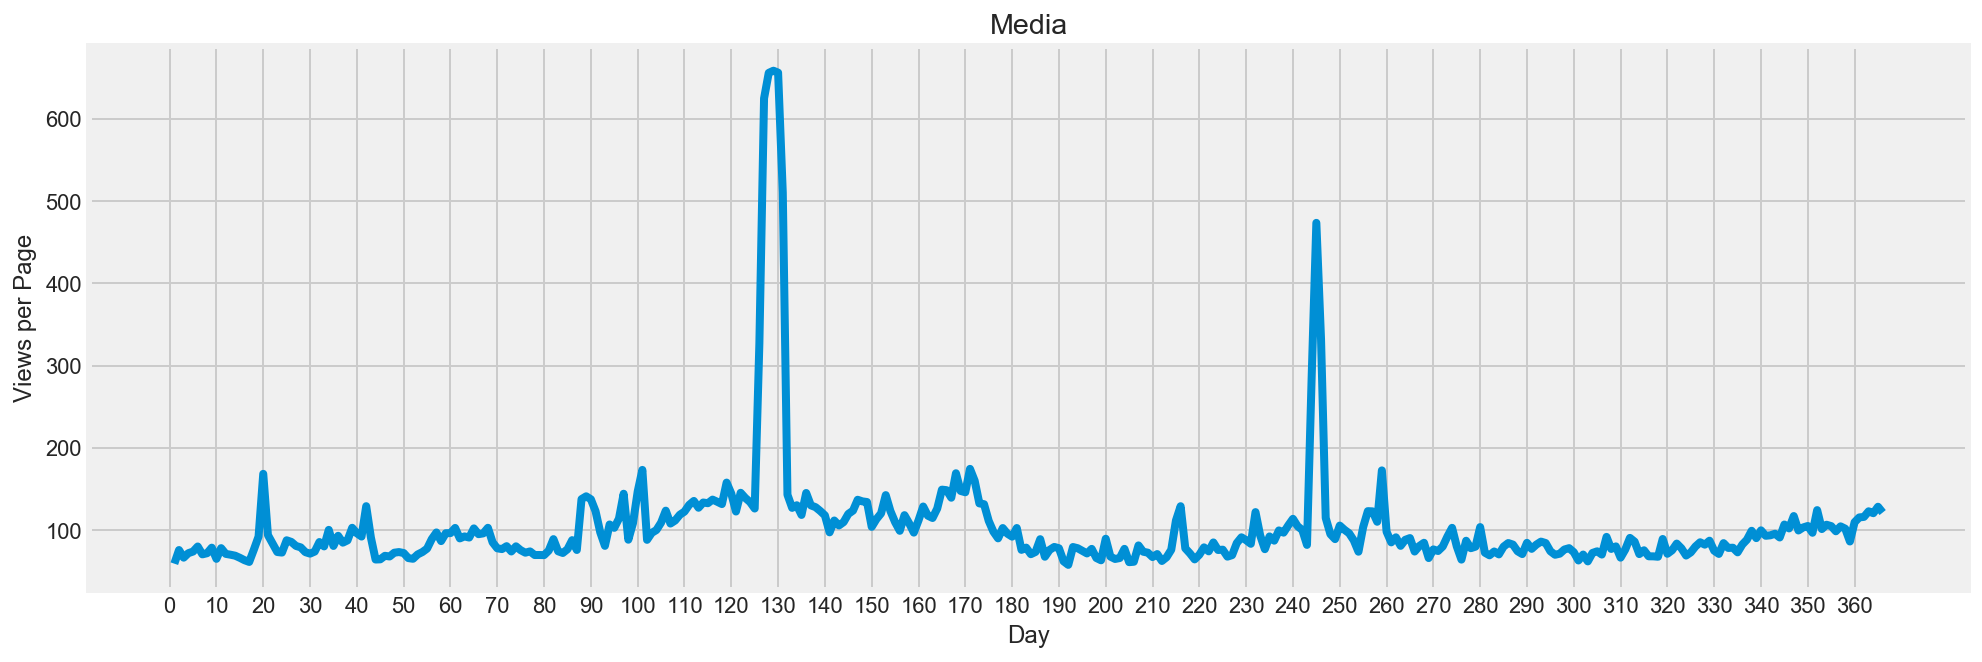

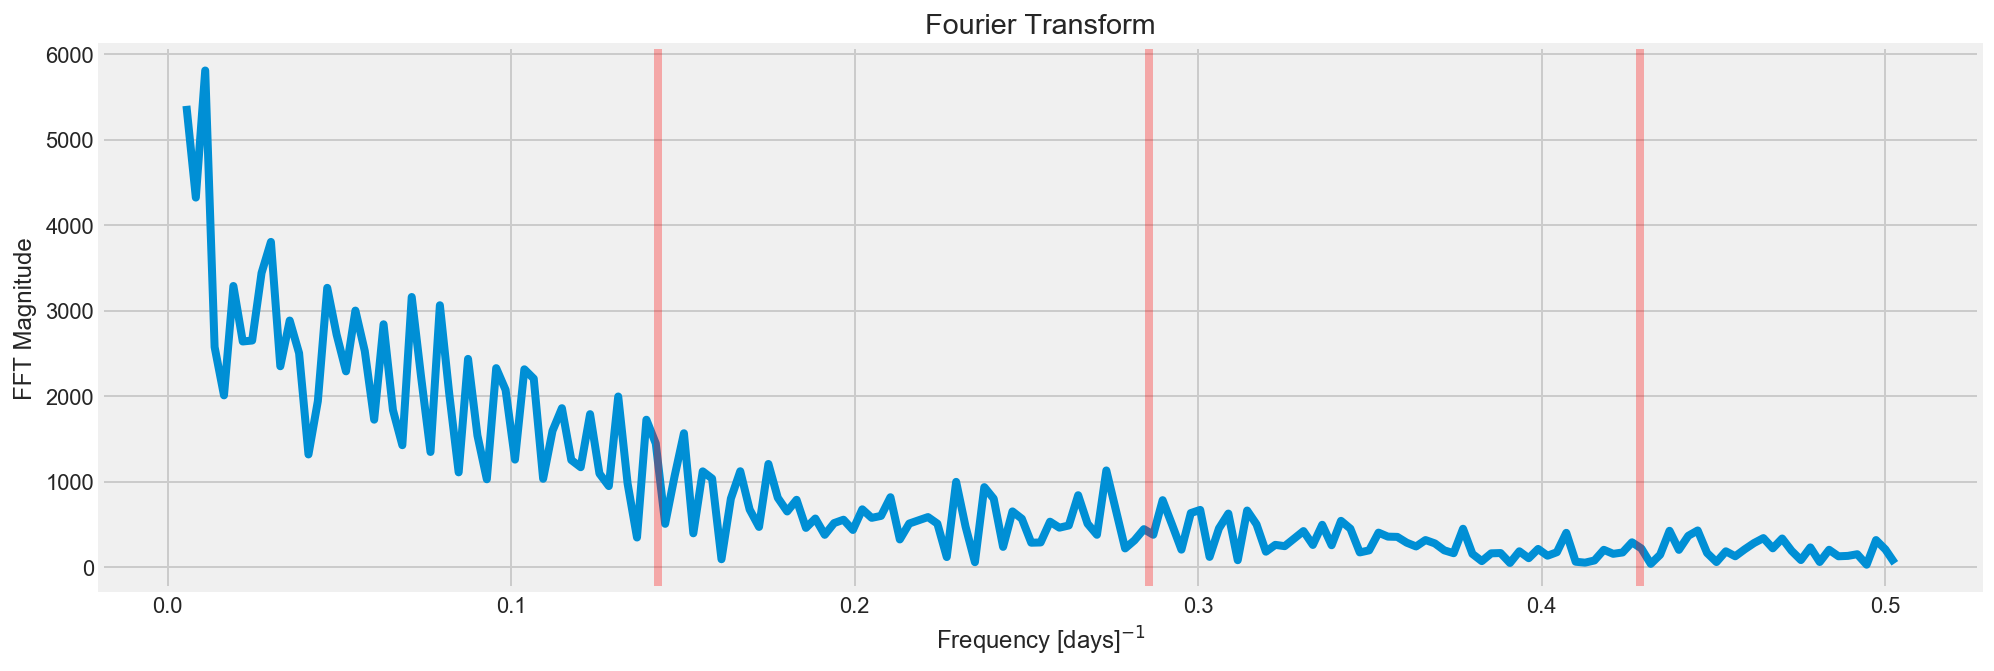

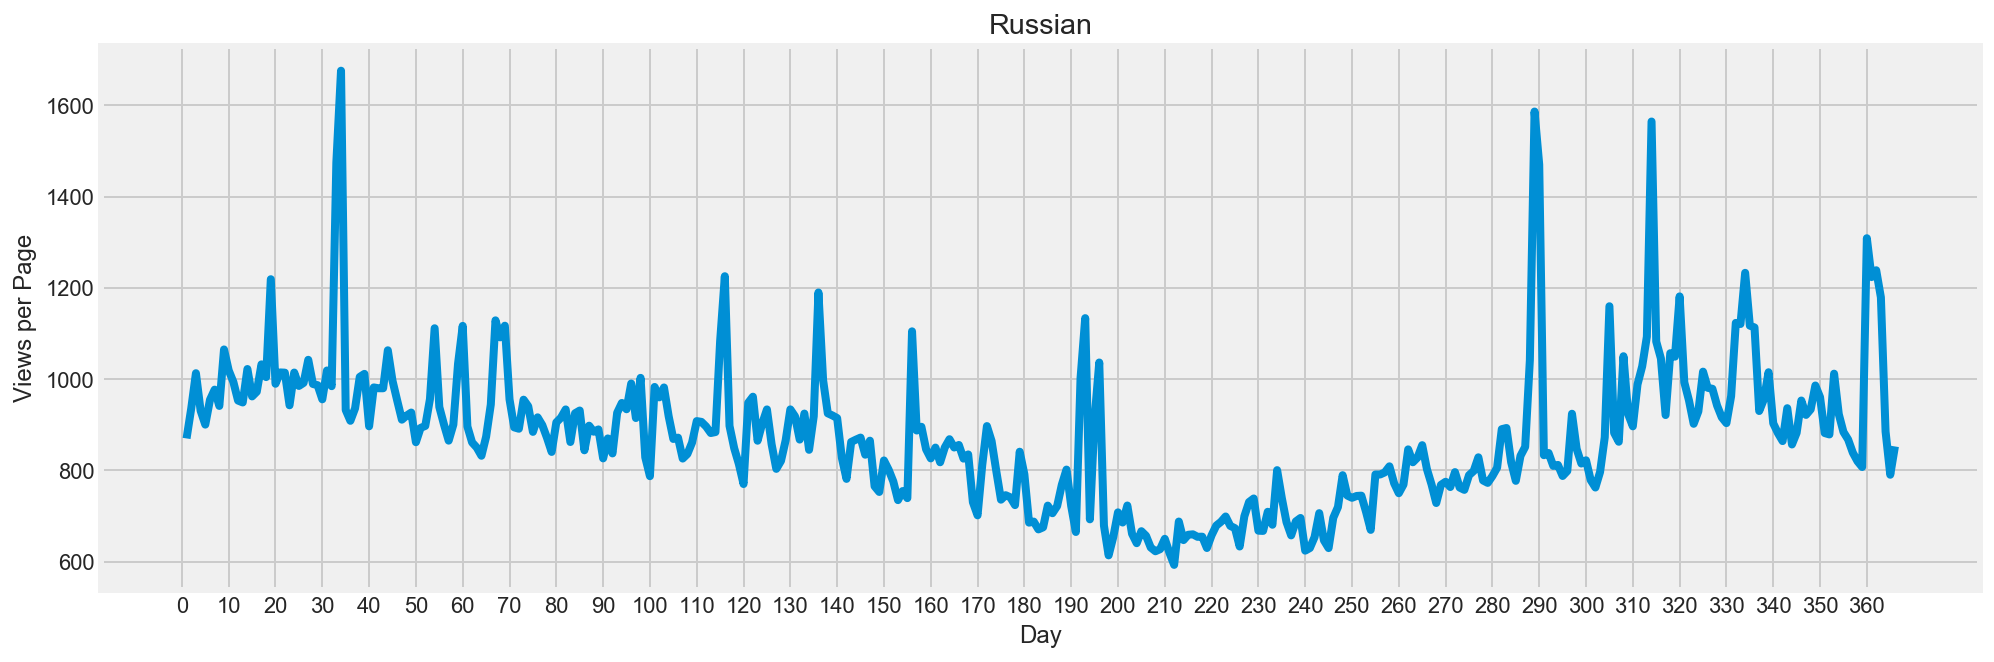

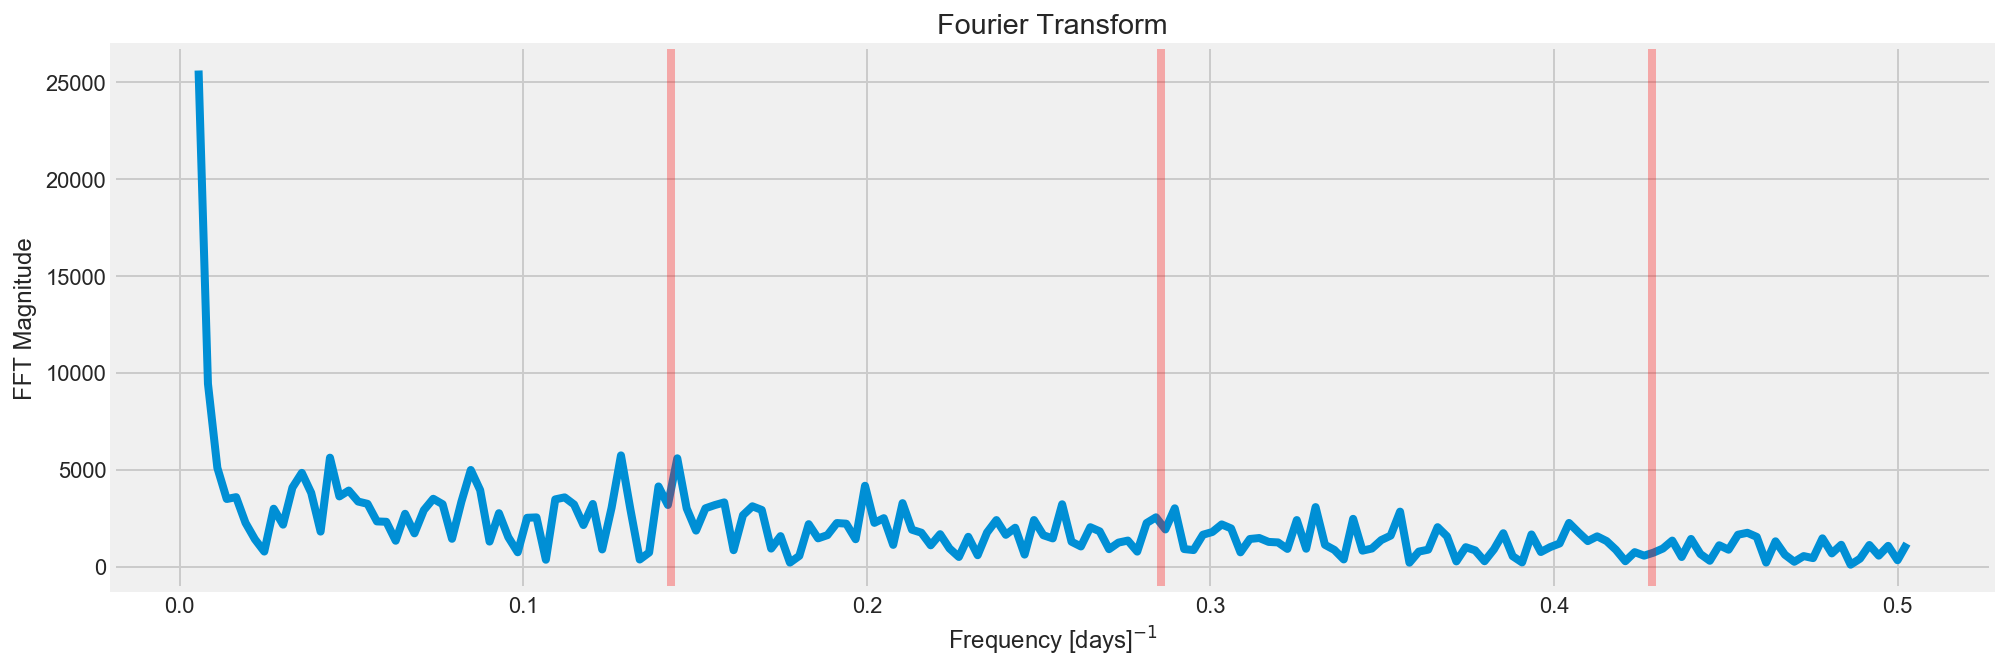

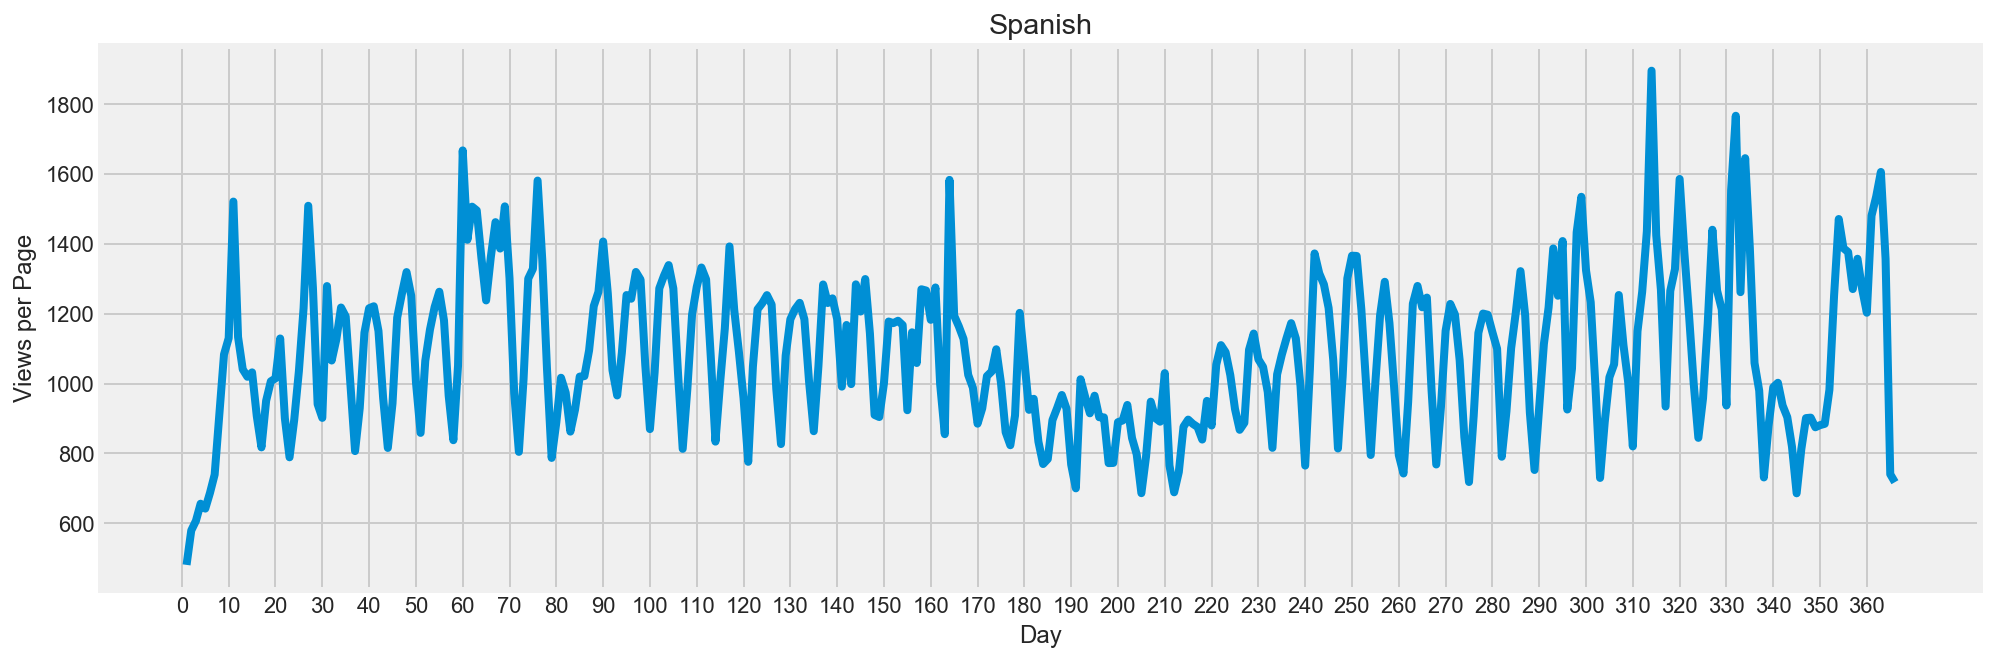

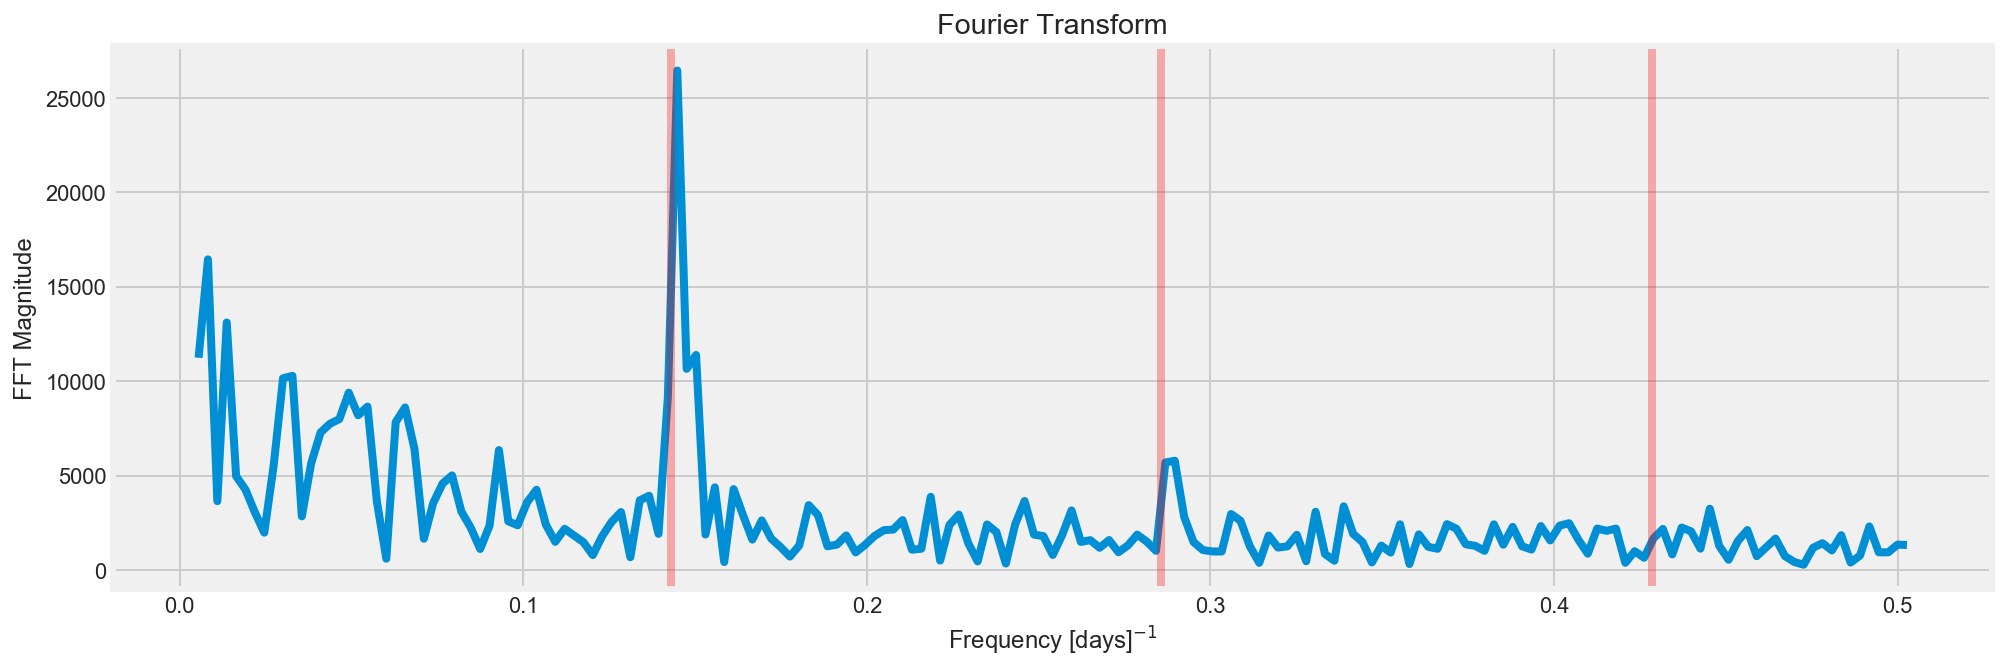

In [44]:
def plot_with_fft(df_daily, col):
    from scipy.fftpack import fft
    
    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    
    plt.title(col)
    plt.xticks(range(0,370,10))
    plt.plot(days, df_daily[col].to_numpy(),label = col )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(df_daily[col].to_numpy())
    
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x))
               for x in fft_complex]
    
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = col )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()
    
for col in df_daily.columns:
    plot_with_fft(df_daily, col)